In [123]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import json
import seaborn as sns
import random

# Import combined data

## HillClimber combined

In [2]:
hc_results = pd.read_csv('hc_runs_combined3_incl_conv_greedy.csv')
hc_results.head()

,instance_id,random_initial_makespan,best_makespan_4,best_makespan_5,best_makespan_250,best_makespan_500,best_makespan_750,best_makespan_6
0,0,66.000000,51.666667,51.666667,51.666667,51.666667,51.666667,51.666667
1,1,67.666667,52.666667,52.666667,52.666667,52.666667,52.666667,52.666667
2,2,87.333333,58.333333,58.333333,58.333333,58.333333,58.333333,58.333333
3,3,89.333333,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
4,4,94.333333,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000


In [3]:
hc_results.tail()

,instance_id,random_initial_makespan,best_makespan_4,best_makespan_5,best_makespan_250,best_makespan_500,best_makespan_750,best_makespan_6
415,415,1132.666667,820.666667,783.666667,776.333333,773.666667,773.666667,771.666667
416,416,1068.666667,802.000000,777.000000,762.333333,750.000000,748.666667,748.666667
417,417,1114.000000,788.000000,764.333333,763.666667,759.666667,758.333333,757.333333
418,418,1163.000000,821.333333,777.333333,766.333333,764.666667,763.333333,760.333333
419,419,1061.666667,815.333333,781.000000,768.333333,761.333333,761.333333,759.333333


## Sum all found best makespans HC Greedy

In [4]:
hc_results['best_makespan_6'].sum()

164419.6666666667

## FFA HillClimber combined

In [5]:
ffahc_results = pd.read_csv('ffahc_runs_combined3_incl_conv_greedy.csv')
ffahc_results.head()

,instance_id,random_initial_makespan,best_makespan_4,best_makespan_5,best_makespan_250,best_makespan_500,best_makespan_750,best_makespan_6
0,0,63.666667,48.000000,48.0,48.0,48.0,48.0,48.0
1,1,73.000000,48.000000,48.0,48.0,48.0,48.0,48.0
2,2,76.333333,52.000000,52.0,52.0,52.0,52.0,52.0
3,3,75.666667,56.666667,54.0,54.0,54.0,54.0,54.0
4,4,96.666667,61.666667,61.0,61.0,61.0,61.0,61.0


In [6]:
ffahc_results.tail()

,instance_id,random_initial_makespan,best_makespan_4,best_makespan_5,best_makespan_250,best_makespan_500,best_makespan_750,best_makespan_6
415,415,1138.333333,959.666667,851.000000,824.333333,797.666667,793.000000,782.0
416,416,1094.333333,927.333333,841.333333,809.666667,787.666667,766.666667,747.0
417,417,1073.000000,930.666667,841.000000,808.000000,786.333333,767.333333,763.0
418,418,1126.333333,945.666667,854.000000,841.666667,795.333333,795.333333,778.0
419,419,1092.000000,950.333333,863.000000,830.333333,805.333333,799.000000,783.0


## Sum all found FFA-HC makespan Greedy

In [117]:
ffahc_results['best_makespan_6'].sum()

161028.0

## Results heatmaps

In [8]:
job_shop_df = pd.read_csv('job_shop_data.csv', sep=';', index_col=False)
job_shop_df.head()

,instance_id,num_jobs,num_machines,problem_instance
0,5j5m,5,5,"[[(3, 6), (1, 4), (2, 1), (0, 3), (4, 6)], [(0..."
1,5j6m,5,6,"[[(5, 9), (3, 5), (0, 7), (2, 2), (1, 2), (4, ..."
2,5j7m,5,7,"[[(5, 7), (6, 3), (3, 4), (1, 1), (2, 4), (4, ..."
3,5j8m,5,8,"[[(1, 7), (3, 9), (6, 3), (0, 8), (2, 1), (7, ..."
4,5j9m,5,9,"[[(7, 6), (4, 10), (8, 1), (2, 2), (1, 10), (5..."


### 10^4 heatmap

In [9]:
job_shop_df['hc_best_makespan_4'] = hc_results['best_makespan_4']
job_shop_df['ffahc_best_makespan_4'] = ffahc_results['best_makespan_4']
job_shop_df.head()

,instance_id,num_jobs,num_machines,problem_instance,hc_best_makespan_4,ffahc_best_makespan_4
0,5j5m,5,5,"[[(3, 6), (1, 4), (2, 1), (0, 3), (4, 6)], [(0...",51.666667,48.000000
1,5j6m,5,6,"[[(5, 9), (3, 5), (0, 7), (2, 2), (1, 2), (4, ...",52.666667,48.000000
2,5j7m,5,7,"[[(5, 7), (6, 3), (3, 4), (1, 1), (2, 4), (4, ...",58.333333,52.000000
3,5j8m,5,8,"[[(1, 7), (3, 9), (6, 3), (0, 8), (2, 1), (7, ...",59.000000,56.666667
4,5j9m,5,9,"[[(7, 6), (4, 10), (8, 1), (2, 2), (1, 10), (5...",74.000000,61.666667


In [10]:
def ffahc_larger_4(row):
    if row['ffahc_best_makespan_4'] < row['hc_best_makespan_4']:
        return 1
    elif row['ffahc_best_makespan_4'] == row['hc_best_makespan_4']:
        return 0.5
    else:
        return 0

In [11]:
job_shop_df['ffahc_winner_4'] = job_shop_df.apply(ffahc_larger_4, axis=1)

In [12]:
# percentage FFA wins
len(job_shop_df[job_shop_df['ffahc_winner_4'] == 1.0]) / 420 * 100

6.904761904761905

In [13]:
#percentage of ties
len(job_shop_df[job_shop_df['ffahc_winner_4'] == 0.5]) / 420 * 100

0.2380952380952381

In [14]:
#percentage of hc wins
len(job_shop_df[job_shop_df['ffahc_winner_4'] == 0.0]) / 420 * 100

92.85714285714286

In [16]:
heatmap_pivot_4 = pd.DataFrame()
heatmap_pivot_4['num_jobs'] = job_shop_df['num_jobs']
heatmap_pivot_4['num_machines'] = job_shop_df['num_machines']
heatmap_pivot_4['ffahc_winner_4'] = job_shop_df['ffahc_winner_4']
heatmap_pivot_4 = heatmap_pivot_4.pivot('num_jobs', 'num_machines', 'ffahc_winner_4')
heatmap_pivot_4 =heatmap_pivot_4.iloc[::-1]
heatmap_pivot_4

num_machines,5,6,7,8,9,10,11,12,13,14,...,16,17,18,19,20,21,22,23,24,25
num_jobs,,,,,,,,,,,,,,,,,,,,,
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


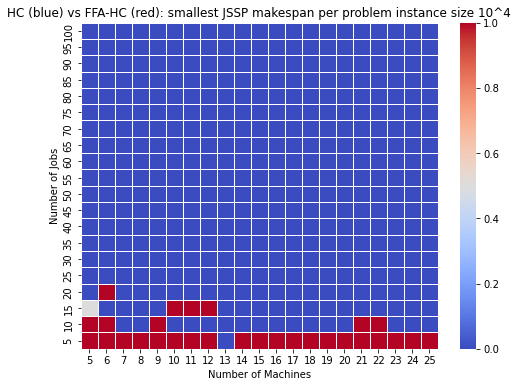

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_pivot_4, annot=False, cmap='coolwarm', linewidths=1)

# Add labels and title
plt.xlabel('Number of Machines')
plt.ylabel('Number of Jobs')
plt.title('HC (blue) vs FFA-HC (red): smallest JSSP makespan per problem instance size 10^4')

# Display the heatmap
plt.show()

### 10^5 heatmap

In [18]:
job_shop_df['hc_best_makespan_5'] = hc_results['best_makespan_5']
job_shop_df['ffahc_best_makespan_5'] = ffahc_results['best_makespan_5']
job_shop_df.head()

,instance_id,num_jobs,num_machines,problem_instance,hc_best_makespan_4,ffahc_best_makespan_4,ffahc_winner_4,hc_best_makespan_5,ffahc_best_makespan_5
0,5j5m,5,5,"[[(3, 6), (1, 4), (2, 1), (0, 3), (4, 6)], [(0...",51.666667,48.000000,1.0,51.666667,48.0
1,5j6m,5,6,"[[(5, 9), (3, 5), (0, 7), (2, 2), (1, 2), (4, ...",52.666667,48.000000,1.0,52.666667,48.0
2,5j7m,5,7,"[[(5, 7), (6, 3), (3, 4), (1, 1), (2, 4), (4, ...",58.333333,52.000000,1.0,58.333333,52.0
3,5j8m,5,8,"[[(1, 7), (3, 9), (6, 3), (0, 8), (2, 1), (7, ...",59.000000,56.666667,1.0,59.000000,54.0
4,5j9m,5,9,"[[(7, 6), (4, 10), (8, 1), (2, 2), (1, 10), (5...",74.000000,61.666667,1.0,74.000000,61.0


In [19]:
def ffahc_larger_5(row):
    if row['ffahc_best_makespan_5'] < row['hc_best_makespan_5']:
        return 1
    elif row['ffahc_best_makespan_5'] == row['hc_best_makespan_5']:
        return 0.5
    else:
        return 0

In [20]:
job_shop_df['ffahc_winner_5'] = job_shop_df.apply(ffahc_larger_5, axis=1)

In [21]:
# percentage FFA wins
len(job_shop_df[job_shop_df['ffahc_winner_5'] == 1.0]) / 420 * 100

23.57142857142857

In [22]:
# percentage ties
len(job_shop_df[job_shop_df['ffahc_winner_5'] == 0.5]) / 420 * 100

4.285714285714286

In [23]:
# percentage HC wins
len(job_shop_df[job_shop_df['ffahc_winner_5'] == 0.0]) / 420 * 100

72.14285714285714

In [24]:
heatmap_pivot_5 = pd.DataFrame()
heatmap_pivot_5['num_jobs'] = job_shop_df['num_jobs']
heatmap_pivot_5['num_machines'] = job_shop_df['num_machines']
heatmap_pivot_5['ffahc_winner_5'] = job_shop_df['ffahc_winner_5']
heatmap_pivot_5 = heatmap_pivot_5.pivot('num_jobs', 'num_machines', 'ffahc_winner_5')
heatmap_pivot_5 =heatmap_pivot_5.iloc[::-1]
heatmap_pivot_5

num_machines,5,6,7,8,9,10,11,12,13,14,...,16,17,18,19,20,21,22,23,24,25
num_jobs,,,,,,,,,,,,,,,,,,,,,
100,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,0.0,0.5,1.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


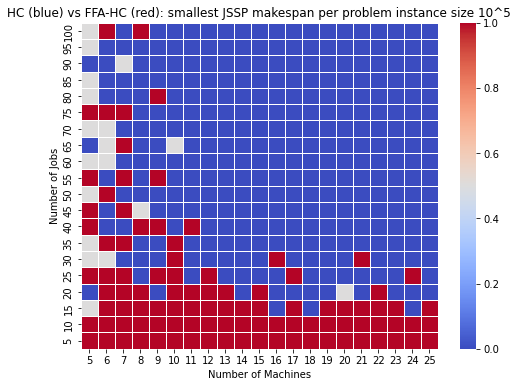

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_pivot_5, annot=False, cmap='coolwarm', linewidths=1, vmin=0, vmax=1)

# Add labels and title
plt.xlabel('Number of Machines')
plt.ylabel('Number of Jobs')
plt.title('HC (blue) vs FFA-HC (red): smallest JSSP makespan per problem instance size 10^5')

# Display the heatmap
plt.show()

### 250,000 heatmap

In [26]:
job_shop_df['hc_best_makespan_250'] = hc_results['best_makespan_250']
job_shop_df['ffahc_best_makespan_250'] = ffahc_results['best_makespan_250']
job_shop_df.head()

,instance_id,num_jobs,num_machines,problem_instance,hc_best_makespan_4,ffahc_best_makespan_4,ffahc_winner_4,hc_best_makespan_5,ffahc_best_makespan_5,ffahc_winner_5,hc_best_makespan_250,ffahc_best_makespan_250
0,5j5m,5,5,"[[(3, 6), (1, 4), (2, 1), (0, 3), (4, 6)], [(0...",51.666667,48.000000,1.0,51.666667,48.0,1.0,51.666667,48.0
1,5j6m,5,6,"[[(5, 9), (3, 5), (0, 7), (2, 2), (1, 2), (4, ...",52.666667,48.000000,1.0,52.666667,48.0,1.0,52.666667,48.0
2,5j7m,5,7,"[[(5, 7), (6, 3), (3, 4), (1, 1), (2, 4), (4, ...",58.333333,52.000000,1.0,58.333333,52.0,1.0,58.333333,52.0
3,5j8m,5,8,"[[(1, 7), (3, 9), (6, 3), (0, 8), (2, 1), (7, ...",59.000000,56.666667,1.0,59.000000,54.0,1.0,59.000000,54.0
4,5j9m,5,9,"[[(7, 6), (4, 10), (8, 1), (2, 2), (1, 10), (5...",74.000000,61.666667,1.0,74.000000,61.0,1.0,74.000000,61.0


In [27]:
def ffahc_larger_250(row):
    if row['ffahc_best_makespan_250'] < row['hc_best_makespan_250']:
        return 1
    elif row['ffahc_best_makespan_250'] == row['hc_best_makespan_250']:
        return 0.5
    else:
        return 0

In [28]:
job_shop_df['ffahc_winner_250'] = job_shop_df.apply(ffahc_larger_250, axis=1)

In [29]:
# percentage FFA wins
len(job_shop_df[job_shop_df['ffahc_winner_250'] == 1.0]) / 420 * 100

44.285714285714285

In [30]:
# percentage ties
len(job_shop_df[job_shop_df['ffahc_winner_250'] == 0.5]) / 420 * 100

4.285714285714286

In [31]:
# percentage HC wins
len(job_shop_df[job_shop_df['ffahc_winner_250'] == 0.0]) / 420 * 100

51.42857142857142

In [32]:
heatmap_pivot_250 = pd.DataFrame()
heatmap_pivot_250['num_jobs'] = job_shop_df['num_jobs']
heatmap_pivot_250['num_machines'] = job_shop_df['num_machines']
heatmap_pivot_250['ffahc_winner_250'] = job_shop_df['ffahc_winner_250']
heatmap_pivot_250 = heatmap_pivot_250.pivot('num_jobs', 'num_machines', 'ffahc_winner_250')
heatmap_pivot_250 =heatmap_pivot_250.iloc[::-1]
heatmap_pivot_250

num_machines,5,6,7,8,9,10,11,12,13,14,...,16,17,18,19,20,21,22,23,24,25
num_jobs,,,,,,,,,,,,,,,,,,,,,
100,0.5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,0.5,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,0.5,0.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0.5,0.5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,0.5,0.5,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,1.0,1.0,1.0,1.0,0.5,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.5,0.5,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


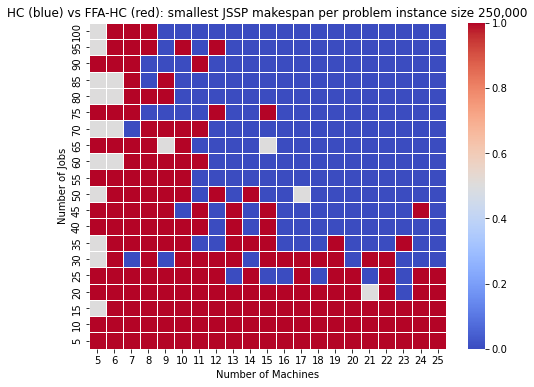

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_pivot_250, annot=False, cmap='coolwarm', linewidths=1)

# Add labels and title
plt.xlabel('Number of Machines')
plt.ylabel('Number of Jobs')
plt.title('HC (blue) vs FFA-HC (red): smallest JSSP makespan per problem instance size 250,000')

# Display the heatmap
plt.show()

### 500,000 heatmap

In [40]:
job_shop_df['hc_best_makespan_500'] = hc_results['best_makespan_500']
job_shop_df['ffahc_best_makespan_500'] = ffahc_results['best_makespan_500']
job_shop_df.head()

,instance_id,num_jobs,num_machines,problem_instance,hc_best_makespan_4,ffahc_best_makespan_4,ffahc_winner_4,hc_best_makespan_5,ffahc_best_makespan_5,ffahc_winner_5,hc_best_makespan_250,ffahc_best_makespan_250,ffahc_winner_250,hc_best_makespan_500,ffahc_best_makespan_500,ffahc_winner_500
0,5j5m,5,5,"[[(3, 6), (1, 4), (2, 1), (0, 3), (4, 6)], [(0...",51.666667,48.000000,1.0,51.666667,48.0,1.0,51.666667,48.0,1.0,51.666667,48.0,1.0
1,5j6m,5,6,"[[(5, 9), (3, 5), (0, 7), (2, 2), (1, 2), (4, ...",52.666667,48.000000,1.0,52.666667,48.0,1.0,52.666667,48.0,1.0,52.666667,48.0,1.0
2,5j7m,5,7,"[[(5, 7), (6, 3), (3, 4), (1, 1), (2, 4), (4, ...",58.333333,52.000000,1.0,58.333333,52.0,1.0,58.333333,52.0,1.0,58.333333,52.0,1.0
3,5j8m,5,8,"[[(1, 7), (3, 9), (6, 3), (0, 8), (2, 1), (7, ...",59.000000,56.666667,1.0,59.000000,54.0,1.0,59.000000,54.0,1.0,59.000000,54.0,1.0
4,5j9m,5,9,"[[(7, 6), (4, 10), (8, 1), (2, 2), (1, 10), (5...",74.000000,61.666667,1.0,74.000000,61.0,1.0,74.000000,61.0,1.0,74.000000,61.0,1.0


In [41]:
def ffahc_larger_500(row):
    if row['ffahc_best_makespan_500'] < row['hc_best_makespan_500']:
        return 1
    elif row['ffahc_best_makespan_500'] == row['hc_best_makespan_500']:
        return 0.5
    else:
        return 0

In [42]:
job_shop_df['ffahc_winner_500'] = job_shop_df.apply(ffahc_larger_500, axis=1)

In [43]:
# percentage FFA wins
len(job_shop_df[job_shop_df['ffahc_winner_500'] == 1.0]) / 420 * 100

61.66666666666667

In [44]:
# percentage Ties
len(job_shop_df[job_shop_df['ffahc_winner_500'] == 0.5]) / 420 * 100

4.0476190476190474

In [45]:
# percentage HC wins
len(job_shop_df[job_shop_df['ffahc_winner_500'] == 0.0]) / 420 * 100

34.285714285714285

In [46]:
heatmap_pivot_500 = pd.DataFrame()
heatmap_pivot_500['num_jobs'] = job_shop_df['num_jobs']
heatmap_pivot_500['num_machines'] = job_shop_df['num_machines']
heatmap_pivot_500['ffahc_winner_500'] = job_shop_df['ffahc_winner_500']
heatmap_pivot_500 = heatmap_pivot_500.pivot('num_jobs', 'num_machines', 'ffahc_winner_500')
heatmap_pivot_500 =heatmap_pivot_500.iloc[::-1]
heatmap_pivot_500

num_machines,5,6,7,8,9,10,11,12,13,14,...,16,17,18,19,20,21,22,23,24,25
num_jobs,,,,,,,,,,,,,,,,,,,,,
100,0.5,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,0.5,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,0.5,0.5,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0.5,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,0.5,0.5,1.0,1.0,1.0,1.0,1.0,0.0,0.5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.5,0.5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


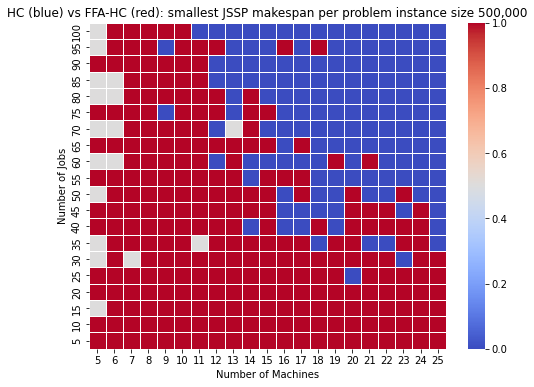

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_pivot_500, annot=False, cmap='coolwarm', linewidths=1)

# Add labels and title
plt.xlabel('Number of Machines')
plt.ylabel('Number of Jobs')
plt.title('HC (blue) vs FFA-HC (red): smallest JSSP makespan per problem instance size 500,000')

# Display the heatmap
plt.show()

### 750,000 heatmap

In [48]:
job_shop_df['hc_best_makespan_750'] = hc_results['best_makespan_750']
job_shop_df['ffahc_best_makespan_750'] = ffahc_results['best_makespan_750']
job_shop_df.head()

,instance_id,num_jobs,num_machines,problem_instance,hc_best_makespan_4,ffahc_best_makespan_4,ffahc_winner_4,hc_best_makespan_5,ffahc_best_makespan_5,ffahc_winner_5,hc_best_makespan_250,ffahc_best_makespan_250,ffahc_winner_250,hc_best_makespan_500,ffahc_best_makespan_500,ffahc_winner_500,hc_best_makespan_750,ffahc_best_makespan_750
0,5j5m,5,5,"[[(3, 6), (1, 4), (2, 1), (0, 3), (4, 6)], [(0...",51.666667,48.000000,1.0,51.666667,48.0,1.0,51.666667,48.0,1.0,51.666667,48.0,1.0,51.666667,48.0
1,5j6m,5,6,"[[(5, 9), (3, 5), (0, 7), (2, 2), (1, 2), (4, ...",52.666667,48.000000,1.0,52.666667,48.0,1.0,52.666667,48.0,1.0,52.666667,48.0,1.0,52.666667,48.0
2,5j7m,5,7,"[[(5, 7), (6, 3), (3, 4), (1, 1), (2, 4), (4, ...",58.333333,52.000000,1.0,58.333333,52.0,1.0,58.333333,52.0,1.0,58.333333,52.0,1.0,58.333333,52.0
3,5j8m,5,8,"[[(1, 7), (3, 9), (6, 3), (0, 8), (2, 1), (7, ...",59.000000,56.666667,1.0,59.000000,54.0,1.0,59.000000,54.0,1.0,59.000000,54.0,1.0,59.000000,54.0
4,5j9m,5,9,"[[(7, 6), (4, 10), (8, 1), (2, 2), (1, 10), (5...",74.000000,61.666667,1.0,74.000000,61.0,1.0,74.000000,61.0,1.0,74.000000,61.0,1.0,74.000000,61.0


In [49]:
def ffahc_larger_750(row):
    if row['ffahc_best_makespan_750'] < row['hc_best_makespan_750']:
        return 1
    elif row['ffahc_best_makespan_750'] == row['hc_best_makespan_750']:
        return 0.5
    else:
        return 0

In [50]:
job_shop_df['ffahc_winner_750'] = job_shop_df.apply(ffahc_larger_750, axis=1)

In [51]:
# percentage FFA wins
len(job_shop_df[job_shop_df['ffahc_winner_750'] == 1.0]) / 420 * 100

71.19047619047619

In [52]:
# percentage Ties
len(job_shop_df[job_shop_df['ffahc_winner_750'] == 0.5]) / 420 * 100

4.285714285714286

In [53]:
# percentage HC wins
len(job_shop_df[job_shop_df['ffahc_winner_750'] == 0.0]) / 420 * 100

24.523809523809522

In [54]:
heatmap_pivot_750 = pd.DataFrame()
heatmap_pivot_750['num_jobs'] = job_shop_df['num_jobs']
heatmap_pivot_750['num_machines'] = job_shop_df['num_machines']
heatmap_pivot_750['ffahc_winner_750'] = job_shop_df['ffahc_winner_750']
heatmap_pivot_750 = heatmap_pivot_750.pivot('num_jobs', 'num_machines', 'ffahc_winner_750')
heatmap_pivot_750 =heatmap_pivot_750.iloc[::-1]
heatmap_pivot_750

num_machines,5,6,7,8,9,10,11,12,13,14,...,16,17,18,19,20,21,22,23,24,25
num_jobs,,,,,,,,,,,,,,,,,,,,,
100,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
95,0.5,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,0.5,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0.5,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
70,0.5,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
65,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
60,0.5,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


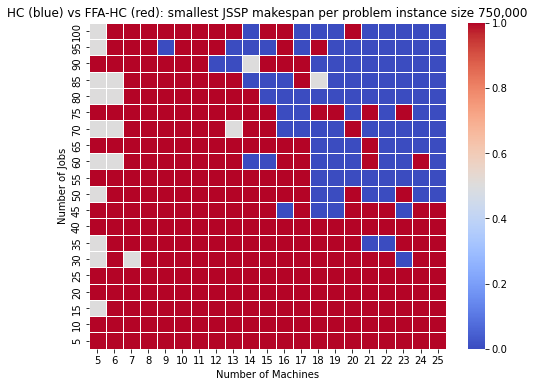

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_pivot_750, annot=False, cmap='coolwarm', linewidths=1)

# Add labels and title
plt.xlabel('Number of Machines')
plt.ylabel('Number of Jobs')
plt.title('HC (blue) vs FFA-HC (red): smallest JSSP makespan per problem instance size 750,000')

# Display the heatmap
plt.show()

### 10^6 heatmap

In [56]:
job_shop_df['hc_best_makespan_6'] = hc_results['best_makespan_6']
job_shop_df['ffahc_best_makespan_6'] = ffahc_results['best_makespan_6']
job_shop_df.head()

,instance_id,num_jobs,num_machines,problem_instance,hc_best_makespan_4,ffahc_best_makespan_4,ffahc_winner_4,hc_best_makespan_5,ffahc_best_makespan_5,ffahc_winner_5,...,ffahc_best_makespan_250,ffahc_winner_250,hc_best_makespan_500,ffahc_best_makespan_500,ffahc_winner_500,hc_best_makespan_750,ffahc_best_makespan_750,ffahc_winner_750,hc_best_makespan_6,ffahc_best_makespan_6
0,5j5m,5,5,"[[(3, 6), (1, 4), (2, 1), (0, 3), (4, 6)], [(0...",51.666667,48.000000,1.0,51.666667,48.0,1.0,...,48.0,1.0,51.666667,48.0,1.0,51.666667,48.0,1.0,51.666667,48.0
1,5j6m,5,6,"[[(5, 9), (3, 5), (0, 7), (2, 2), (1, 2), (4, ...",52.666667,48.000000,1.0,52.666667,48.0,1.0,...,48.0,1.0,52.666667,48.0,1.0,52.666667,48.0,1.0,52.666667,48.0
2,5j7m,5,7,"[[(5, 7), (6, 3), (3, 4), (1, 1), (2, 4), (4, ...",58.333333,52.000000,1.0,58.333333,52.0,1.0,...,52.0,1.0,58.333333,52.0,1.0,58.333333,52.0,1.0,58.333333,52.0
3,5j8m,5,8,"[[(1, 7), (3, 9), (6, 3), (0, 8), (2, 1), (7, ...",59.000000,56.666667,1.0,59.000000,54.0,1.0,...,54.0,1.0,59.000000,54.0,1.0,59.000000,54.0,1.0,59.000000,54.0
4,5j9m,5,9,"[[(7, 6), (4, 10), (8, 1), (2, 2), (1, 10), (5...",74.000000,61.666667,1.0,74.000000,61.0,1.0,...,61.0,1.0,74.000000,61.0,1.0,74.000000,61.0,1.0,74.000000,61.0


In [57]:
def ffahc_larger_6(row):
    if row['ffahc_best_makespan_6'] < row['hc_best_makespan_6']:
        return 1
    elif row['ffahc_best_makespan_6'] == row['hc_best_makespan_6']:
        return 0.5
    else:
        return 0

In [58]:
job_shop_df['ffahc_winner_6'] = job_shop_df.apply(ffahc_larger_6, axis=1)

In [59]:
# percentage FFA wins
len(job_shop_df[job_shop_df['ffahc_winner_6'] == 1.0]) / 420 * 100

81.19047619047619

In [60]:
# percentage Ties
len(job_shop_df[job_shop_df['ffahc_winner_6'] == 0.5]) / 420 * 100

4.523809523809524

In [61]:
# percentage HC wins
len(job_shop_df[job_shop_df['ffahc_winner_6'] == 0.0]) / 420 * 100

14.285714285714285

In [62]:
job_shop_df.head()

,instance_id,num_jobs,num_machines,problem_instance,hc_best_makespan_4,ffahc_best_makespan_4,ffahc_winner_4,hc_best_makespan_5,ffahc_best_makespan_5,ffahc_winner_5,...,ffahc_winner_250,hc_best_makespan_500,ffahc_best_makespan_500,ffahc_winner_500,hc_best_makespan_750,ffahc_best_makespan_750,ffahc_winner_750,hc_best_makespan_6,ffahc_best_makespan_6,ffahc_winner_6
0,5j5m,5,5,"[[(3, 6), (1, 4), (2, 1), (0, 3), (4, 6)], [(0...",51.666667,48.000000,1.0,51.666667,48.0,1.0,...,1.0,51.666667,48.0,1.0,51.666667,48.0,1.0,51.666667,48.0,1.0
1,5j6m,5,6,"[[(5, 9), (3, 5), (0, 7), (2, 2), (1, 2), (4, ...",52.666667,48.000000,1.0,52.666667,48.0,1.0,...,1.0,52.666667,48.0,1.0,52.666667,48.0,1.0,52.666667,48.0,1.0
2,5j7m,5,7,"[[(5, 7), (6, 3), (3, 4), (1, 1), (2, 4), (4, ...",58.333333,52.000000,1.0,58.333333,52.0,1.0,...,1.0,58.333333,52.0,1.0,58.333333,52.0,1.0,58.333333,52.0,1.0
3,5j8m,5,8,"[[(1, 7), (3, 9), (6, 3), (0, 8), (2, 1), (7, ...",59.000000,56.666667,1.0,59.000000,54.0,1.0,...,1.0,59.000000,54.0,1.0,59.000000,54.0,1.0,59.000000,54.0,1.0
4,5j9m,5,9,"[[(7, 6), (4, 10), (8, 1), (2, 2), (1, 10), (5...",74.000000,61.666667,1.0,74.000000,61.0,1.0,...,1.0,74.000000,61.0,1.0,74.000000,61.0,1.0,74.000000,61.0,1.0


In [63]:
custom_xticklabels = job_shop_df['num_jobs']
custom_yticklabels = job_shop_df['num_machines']

In [64]:
heatmap_pivot_6 = pd.DataFrame()
heatmap_pivot_6['num_jobs'] = job_shop_df['num_jobs']
heatmap_pivot_6['num_machines'] = job_shop_df['num_machines']
heatmap_pivot_6['ffahc_winner_6'] = job_shop_df['ffahc_winner_6']
heatmap_pivot_6 = heatmap_pivot_6.pivot('num_jobs', 'num_machines', 'ffahc_winner_6')
heatmap_pivot_6 = heatmap_pivot_6.iloc[::-1]
heatmap_pivot_6

num_machines,5,6,7,8,9,10,11,12,13,14,...,16,17,18,19,20,21,22,23,24,25
num_jobs,,,,,,,,,,,,,,,,,,,,,
100,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
95,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.0
85,0.5,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
80,0.5,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
70,0.5,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.5,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
65,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
60,0.5,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


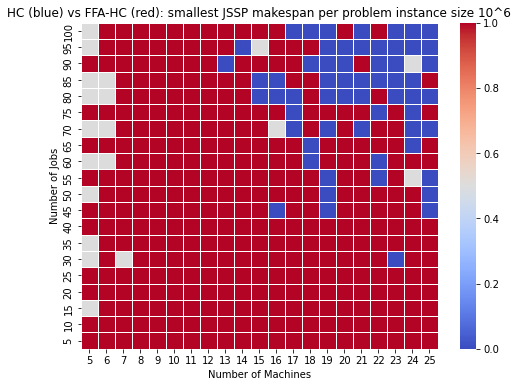

In [65]:
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_pivot_6, annot=False, cmap='coolwarm', linewidths=1)

# Add labels and title
plt.xlabel('Number of Machines')
plt.ylabel('Number of Jobs')
plt.title('HC (blue) vs FFA-HC (red): smallest JSSP makespan per problem instance size 10^6')

# Display the heatmap
plt.show()

## Results heatmap grid

In [66]:
xticks = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
# yticks = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
yticks = [100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10, 5]

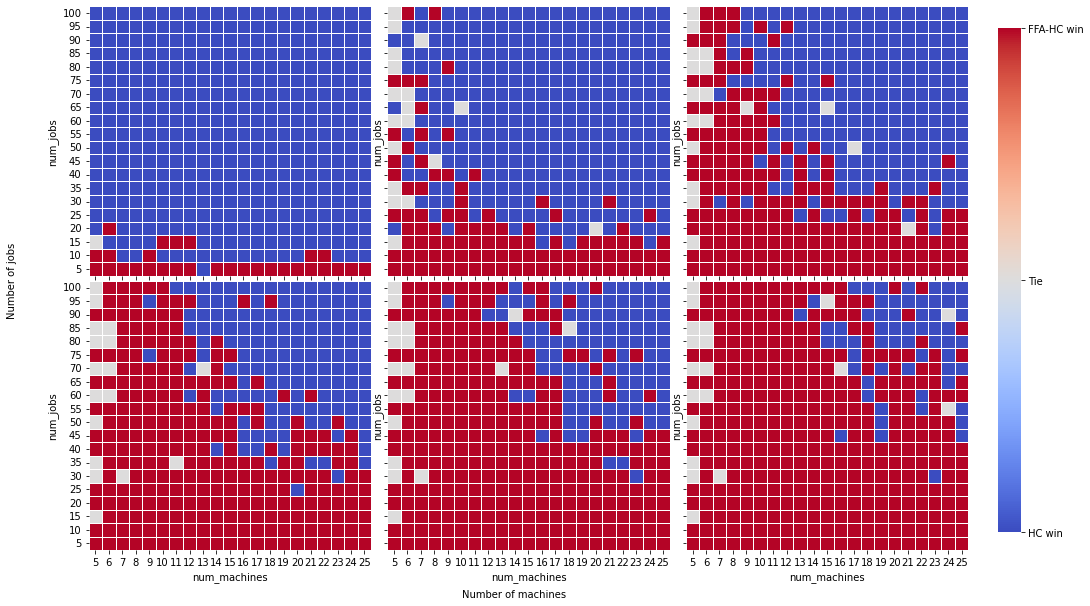

In [67]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(16, 10))
plt.subplots_adjust(wspace=0.01, hspace=0.02)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])

# Set a single y-axis label for the entire grid
fig.text(0.06, 0.5, 'Number of jobs', va='center', rotation='vertical')

# Set a single x-axis label for the entire grid
fig.text(0.5, 0.06, 'Number of machines', ha='center')

# plt.subplot(grid[0, 0])
ax = plt.subplot(2, 3, 1)
sns.heatmap(heatmap_pivot_4, annot=False, cmap='coolwarm', linewidths=1, 
            yticklabels=yticks, cbar=False, ax=ax, vmin=0, vmax=1)
ax.set_aspect('equal')


# plt.subplot(grid[0, 1])
ax = plt.subplot(2, 3, 2)
sns.heatmap(heatmap_pivot_5, annot=False, cmap='coolwarm', linewidths=1, 
            cbar=False, ax=ax, vmin=0, vmax=1)
ax.set_aspect('equal')


# plt.subplot(grid[0, 2])
ax = plt.subplot(2, 3, 3)
sns.heatmap(heatmap_pivot_250, annot=False, cmap='coolwarm', linewidths=1, 
            cbar=False, ax=ax, vmin=0, vmax=1)
ax.set_aspect('equal')


# plt.subplot(grid[1, 0])
ax = plt.subplot(2, 3, 4)
sns.heatmap(heatmap_pivot_500, annot=False, cmap='coolwarm', linewidths=1, 
            xticklabels=xticks, yticklabels=yticks, cbar=False, ax=ax, vmin=0, vmax=1)
ax.set_aspect('equal')


# plt.subplot(grid[1, 1])
ax = plt.subplot(2, 3, 5)
sns.heatmap(heatmap_pivot_750, annot=False, cmap='coolwarm', linewidths=1, xticklabels=xticks, 
            cbar=False, ax=ax, vmin=0, vmax=1)
ax.set_aspect('equal')


# plt.subplot(grid[1, 2])
ax = plt.subplot(2, 3, 6)
sns.heatmap(heatmap_pivot_6, annot=False, cmap='coolwarm', linewidths=1, xticklabels=xticks, 
            yticklabels=yticks, cbar=True, cbar_ax=cbar_ax, ax=ax, vmin=0, vmax=1)
ax.set_aspect('equal')

cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 0.5, 1])  # Specify the positions for the custom labels
cbar.set_ticklabels(['HC win', 'Tie', 'FFA-HC win'])  # Set the custom labels


# plt.savefig('heatmaps_greedy.png')
plt.show()

## Outperformance of HC over FFA-HC

In [68]:
hc_winners = job_shop_df[job_shop_df['hc_best_makespan_6'] < job_shop_df['ffahc_best_makespan_6']]

In [69]:
hc_winners['best_makespan_difference'] = job_shop_df['ffahc_best_makespan_6'] - job_shop_df['hc_best_makespan_6']

/var/folders/5q/vfbpp_6n0plgm20rx4v7yt680000gn/T/ipykernel_69363/1668690278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hc_winners['best_makespan_difference'] = job_shop_df['ffahc_best_makespan_6'] - job_shop_df['hc_best_makespan_6']


In [70]:
hc_winners.head(10)

,instance_id,num_jobs,num_machines,problem_instance,hc_best_makespan_4,ffahc_best_makespan_4,ffahc_winner_4,hc_best_makespan_5,ffahc_best_makespan_5,ffahc_winner_5,...,hc_best_makespan_500,ffahc_best_makespan_500,ffahc_winner_500,hc_best_makespan_750,ffahc_best_makespan_750,ffahc_winner_750,hc_best_makespan_6,ffahc_best_makespan_6,ffahc_winner_6,best_makespan_difference
123,30j23m,30,23,"[[(11, 5), (1, 4), (21, 9), (19, 6), (3, 10), ...",345.000000,382.000000,0.0,321.333333,339.333333,0.0,...,315.666667,320.333333,0.0,315.666667,316.000000,0.0,315.666667,316.000000,0.0,0.333333
179,45j16m,45,16,"[[(14, 8), (8, 3), (1, 2), (2, 7), (7, 8), (4,...",375.666667,418.666667,0.0,350.000000,375.666667,0.0,...,348.333333,358.333333,0.0,348.333333,350.666667,0.0,348.333333,349.333333,0.0,1.000000
182,45j19m,45,19,"[[(18, 9), (12, 7), (1, 5), (4, 9), (14, 7), (...",392.000000,457.333333,0.0,375.000000,404.333333,0.0,...,364.666667,377.000000,0.0,364.666667,373.333333,0.0,364.666667,369.333333,0.0,4.666667
188,45j25m,45,25,"[[(3, 5), (13, 6), (1, 10), (11, 7), (15, 6), ...",438.666667,521.000000,0.0,424.000000,465.000000,0.0,...,418.000000,432.333333,0.0,418.000000,417.333333,1.0,411.000000,417.333333,0.0,6.333333
203,50j19m,50,19,"[[(18, 4), (17, 7), (1, 1), (11, 8), (13, 5), ...",410.666667,473.666667,0.0,392.333333,433.333333,0.0,...,390.000000,399.333333,0.0,390.000000,394.000000,0.0,390.000000,394.000000,0.0,4.000000
209,50j25m,50,25,"[[(13, 4), (6, 9), (0, 6), (18, 7), (20, 7), (...",471.333333,544.333333,0.0,444.666667,477.333333,0.0,...,436.000000,449.000000,0.0,436.000000,447.333333,0.0,436.000000,437.333333,0.0,1.333333
224,55j19m,55,19,"[[(15, 10), (8, 6), (12, 9), (2, 6), (0, 2), (...",463.333333,538.333333,0.0,448.666667,474.666667,0.0,...,447.333333,450.666667,0.0,447.333333,448.333333,0.0,447.333333,448.333333,0.0,1.000000
227,55j22m,55,22,"[[(11, 8), (16, 7), (7, 6), (0, 3), (6, 4), (4...",473.333333,555.666667,0.0,454.333333,502.333333,0.0,...,450.333333,468.333333,0.0,450.333333,463.333333,0.0,450.333333,450.666667,0.0,0.333333
230,55j25m,55,25,"[[(0, 5), (17, 2), (6, 7), (3, 9), (19, 1), (8...",531.666667,617.000000,0.0,496.666667,544.000000,0.0,...,491.666667,511.333333,0.0,491.666667,505.333333,0.0,491.666667,493.333333,0.0,1.666667
244,60j18m,60,18,"[[(7, 10), (12, 3), (14, 1), (4, 8), (17, 6), ...",471.333333,554.000000,0.0,450.333333,503.000000,0.0,...,442.000000,451.000000,0.0,442.000000,451.000000,0.0,440.666667,442.333333,0.0,1.666667


In [71]:
sorted_hc_winners = hc_winners.sort_values(by='best_makespan_difference', ascending=False)
sorted_hc_winners.head(3)

,instance_id,num_jobs,num_machines,problem_instance,hc_best_makespan_4,ffahc_best_makespan_4,ffahc_winner_4,hc_best_makespan_5,ffahc_best_makespan_5,ffahc_winner_5,...,hc_best_makespan_500,ffahc_best_makespan_500,ffahc_winner_500,hc_best_makespan_750,ffahc_best_makespan_750,ffahc_winner_750,hc_best_makespan_6,ffahc_best_makespan_6,ffahc_winner_6,best_makespan_difference
396,95j23m,95,23,"[[(5, 1), (0, 10), (17, 8), (3, 2), (10, 5), (...",771.333333,909.666667,0.0,737.666667,822.666667,0.0,...,723.000000,771.000000,0.0,720.000000,765.000000,0.0,719.333333,755.333333,0.0,36.000000
293,70j25m,70,25,"[[(22, 1), (4, 1), (10, 3), (11, 1), (17, 8), ...",619.000000,724.666667,0.0,582.333333,653.333333,0.0,...,572.666667,613.333333,0.0,568.666667,599.666667,0.0,566.666667,599.333333,0.0,32.666667
335,80j25m,80,25,"[[(7, 7), (17, 4), (24, 4), (0, 1), (15, 6), (...",682.666667,806.333333,0.0,653.000000,726.000000,0.0,...,641.000000,683.000000,0.0,639.000000,683.000000,0.0,638.666667,668.000000,0.0,29.333333


## Outperformance of FFA-HC over HC

In [72]:
ffahc_winners = job_shop_df[job_shop_df['ffahc_best_makespan_6'] < job_shop_df['hc_best_makespan_6']]

In [73]:
ffahc_winners['best_makespan_difference'] = job_shop_df['hc_best_makespan_6'] - job_shop_df['ffahc_best_makespan_6']

/var/folders/5q/vfbpp_6n0plgm20rx4v7yt680000gn/T/ipykernel_69363/2179904774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ffahc_winners['best_makespan_difference'] = job_shop_df['hc_best_makespan_6'] - job_shop_df['ffahc_best_makespan_6']


In [74]:
sorted_ffahc_winners = ffahc_winners.sort_values(by='best_makespan_difference', ascending=False)
sorted_ffahc_winners.head(3)

,instance_id,num_jobs,num_machines,problem_instance,hc_best_makespan_4,ffahc_best_makespan_4,ffahc_winner_4,hc_best_makespan_5,ffahc_best_makespan_5,ffahc_winner_5,...,hc_best_makespan_500,ffahc_best_makespan_500,ffahc_winner_500,hc_best_makespan_750,ffahc_best_makespan_750,ffahc_winner_750,hc_best_makespan_6,ffahc_best_makespan_6,ffahc_winner_6,best_makespan_difference
363,90j11m,90,11,"[[(5, 7), (0, 4), (7, 4), (8, 4), (1, 5), (2, ...",619.333333,683.000000,0.0,610.000000,614.666667,0.0,...,608.000000,584.333333,1.0,608.000000,573.000000,1.0,607.666667,570.000000,1.0,37.666667
37,10j21m,10,21,"[[(12, 1), (6, 8), (8, 6), (17, 6), (13, 3), (...",192.666667,179.000000,1.0,192.666667,163.333333,1.0,...,192.666667,155.666667,1.0,192.666667,155.333333,1.0,192.666667,155.000000,1.0,37.666667
62,15j25m,15,25,"[[(13, 9), (8, 5), (20, 10), (10, 7), (6, 8), ...",246.666667,260.666667,0.0,245.000000,231.000000,1.0,...,245.000000,219.000000,1.0,245.000000,216.666667,1.0,245.000000,211.666667,1.0,33.333333


## Import

In [75]:
def custom_literal_eval(x):
    try:
        return json.loads(x)
    except (json.JSONDecodeError, TypeError):
        return x

In [79]:
hc_conversions = pd.read_csv('hc_runs_combined3_conv_only_greedy.csv')
hc_conversions.head(6)

,instance_id,hc1_convergence,hc2_convergence,hc3_convergence
0,0,"[54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 5...","[76, 76, 76, 76, 76, 76, 75, 73, 59, 59, 59, 5...","[68, 67, 67, 67, 67, 66, 66, 61, 55, 55, 55, 5..."
1,37,"[247, 247, 247, 247, 247, 245, 245, 245, 245, ...","[248, 248, 233, 233, 233, 233, 233, 233, 233, ...","[244, 244, 244, 244, 244, 244, 244, 233, 233, ..."
2,62,"[377, 373, 365, 365, 346, 318, 318, 318, 318, ...","[373, 373, 373, 368, 365, 357, 357, 352, 352, ...","[341, 338, 338, 338, 338, 322, 322, 320, 320, ..."
3,293,"[833, 833, 833, 833, 833, 833, 823, 823, 823, ...","[849, 849, 849, 842, 839, 839, 822, 822, 822, ...","[924, 918, 910, 910, 910, 910, 910, 910, 910, ..."
4,335,"[984, 971, 971, 966, 962, 962, 962, 962, 962, ...","[957, 957, 956, 951, 951, 947, 925, 925, 925, ...","[1017, 986, 986, 986, 986, 986, 986, 986, 986,..."
5,363,"[877, 867, 860, 858, 858, 858, 858, 858, 853, ...","[812, 812, 812, 812, 809, 809, 809, 809, 809, ...","[835, 826, 819, 806, 795, 795, 795, 795, 795, ..."


In [80]:
hc_conversions['hc1_convergence'] = hc_conversions['hc1_convergence'].apply(custom_literal_eval)
hc_conversions['hc2_convergence'] = hc_conversions['hc2_convergence'].apply(custom_literal_eval)
hc_conversions['hc3_convergence'] = hc_conversions['hc3_convergence'].apply(custom_literal_eval)

In [82]:
ffahc_conversions = pd.read_csv('ffahc_runs_combined3_conv_only_greedy.csv')
ffahc_conversions.head(6)

,instance_id,ffahc1_convergence,ffahc2_convergence,ffahc3_convergence
0,0,"[64, 64, 62, 62, 62, 62, 62, 62, 62, 62, 55, 5...","[61, 61, 61, 60, 60, 60, 55, 55, 55, 55, 55, 5...","[66, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 6..."
1,37,"[289, 289, 277, 272, 272, 271, 271, 271, 271, ...","[259, 259, 259, 259, 259, 259, 259, 259, 259, ...","[259, 259, 259, 259, 259, 255, 255, 255, 255, ..."
2,62,"[411, 411, 411, 411, 398, 363, 363, 355, 355, ...","[341, 333, 333, 333, 333, 333, 333, 333, 333, ...","[345, 345, 345, 345, 345, 345, 345, 345, 345, ..."
3,293,"[805, 805, 805, 805, 805, 805, 805, 805, 805, ...","[857, 857, 857, 857, 857, 857, 857, 857, 857, ...","[858, 858, 858, 858, 858, 858, 858, 858, 858, ..."
4,335,"[953, 953, 944, 942, 942, 940, 939, 939, 939, ...","[1000, 1000, 1000, 1000, 1000, 1000, 1000, 100...","[959, 959, 950, 950, 950, 950, 950, 950, 950, ..."
5,363,"[855, 855, 846, 824, 822, 822, 822, 822, 822, ...","[765, 765, 765, 765, 765, 765, 765, 765, 765, ...","[786, 786, 786, 786, 786, 786, 786, 786, 786, ..."


In [83]:
ffahc_conversions['ffahc1_convergence'] = ffahc_conversions['ffahc1_convergence'].apply(custom_literal_eval)
ffahc_conversions['ffahc2_convergence'] = ffahc_conversions['ffahc2_convergence'].apply(custom_literal_eval)
ffahc_conversions['ffahc3_convergence'] = ffahc_conversions['ffahc3_convergence'].apply(custom_literal_eval)

## Visualizations

In [84]:
iterations = range(1, len(hc_conversions['hc1_convergence'][0]) + 1)

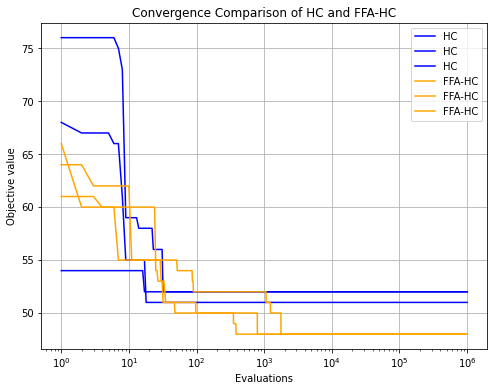

In [85]:
# id 0: 5 jobs x 5 machines
hc_0_conv1 = hc_conversions['hc1_convergence'][0]
hc_0_conv2 = hc_conversions['hc2_convergence'][0]
hc_0_conv3 = hc_conversions['hc3_convergence'][0]

ffahc_0_conv1 = ffahc_conversions['ffahc1_convergence'][0]
ffahc_0_conv2 = ffahc_conversions['ffahc2_convergence'][0]
ffahc_0_conv3 = ffahc_conversions['ffahc3_convergence'][0]

plt.figure(figsize=(8, 6))

plt.plot(iterations, hc_0_conv1, color='blue', label='HC')
plt.plot(iterations, hc_0_conv2, color='blue', label='HC')
plt.plot(iterations, hc_0_conv3, color='blue', label='HC')

plt.plot(iterations, ffahc_0_conv1, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_0_conv2, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_0_conv3, color='orange', label='FFA-HC')

plt.xlabel('Evaluations')
plt.ylabel('Objective value')
plt.title('Convergence Comparison of HC and FFA-HC')
plt.legend()

plt.xscale('log')
plt.grid(True)

plt.show()

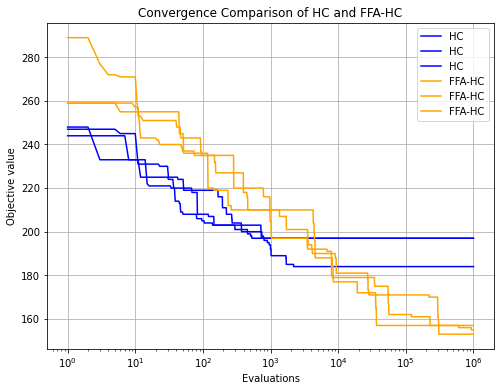

In [86]:
# id 37: 10 jobs x 21 machines
hc_1_conv1 = hc_conversions['hc1_convergence'][1]
hc_1_conv2 = hc_conversions['hc2_convergence'][1]
hc_1_conv3 = hc_conversions['hc3_convergence'][1]

ffahc_1_conv1 = ffahc_conversions['ffahc1_convergence'][1]
ffahc_1_conv2 = ffahc_conversions['ffahc2_convergence'][1]
ffahc_1_conv3 = ffahc_conversions['ffahc3_convergence'][1]

plt.figure(figsize=(8, 6))

plt.plot(iterations, hc_1_conv1, color='blue', label='HC')
plt.plot(iterations, hc_1_conv2, color='blue', label='HC')
plt.plot(iterations, hc_1_conv3, color='blue', label='HC')

plt.plot(iterations, ffahc_1_conv1, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_1_conv2, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_1_conv3, color='orange', label='FFA-HC')

plt.xlabel('Evaluations')
plt.ylabel('Objective value')
plt.title('Convergence Comparison of HC and FFA-HC')
plt.legend()

plt.xscale('log')
plt.grid(True)

plt.show()

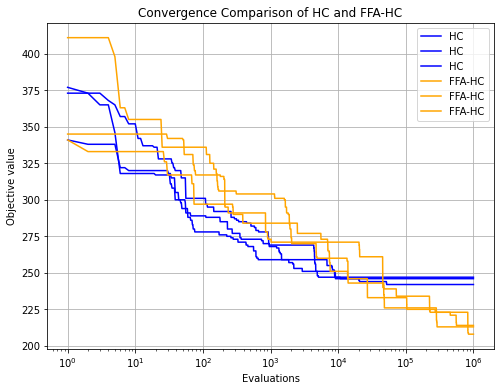

In [87]:
# id 62: 15 jobs x 25 machines
hc_2_conv1 = hc_conversions['hc1_convergence'][2]
hc_2_conv2 = hc_conversions['hc2_convergence'][2]
hc_2_conv3 = hc_conversions['hc3_convergence'][2]

ffahc_2_conv1 = ffahc_conversions['ffahc1_convergence'][2]
ffahc_2_conv2 = ffahc_conversions['ffahc2_convergence'][2]
ffahc_2_conv3 = ffahc_conversions['ffahc3_convergence'][2]

plt.figure(figsize=(8, 6))

plt.plot(iterations, hc_2_conv1, color='blue', label='HC')
plt.plot(iterations, hc_2_conv2, color='blue', label='HC')
plt.plot(iterations, hc_2_conv3, color='blue', label='HC')

plt.plot(iterations, ffahc_2_conv1, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_2_conv2, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_2_conv3, color='orange', label='FFA-HC')

plt.xlabel('Evaluations')
plt.ylabel('Objective value')
plt.title('Convergence Comparison of HC and FFA-HC')
plt.legend()

plt.xscale('log')
plt.grid(True)

plt.show()

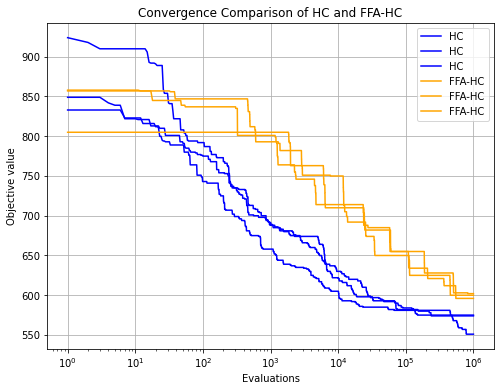

In [88]:
# id 293: 70 jobs x 25 machines
hc_3_conv1 = hc_conversions['hc1_convergence'][3]
hc_3_conv2 = hc_conversions['hc2_convergence'][3]
hc_3_conv3 = hc_conversions['hc3_convergence'][3]

ffahc_3_conv1 = ffahc_conversions['ffahc1_convergence'][3]
ffahc_3_conv2 = ffahc_conversions['ffahc2_convergence'][3]
ffahc_3_conv3 = ffahc_conversions['ffahc3_convergence'][3]

plt.figure(figsize=(8, 6))

plt.plot(iterations, hc_3_conv1, color='blue', label='HC')
plt.plot(iterations, hc_3_conv2, color='blue', label='HC')
plt.plot(iterations, hc_3_conv3, color='blue', label='HC')

plt.plot(iterations, ffahc_3_conv1, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_3_conv2, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_3_conv3, color='orange', label='FFA-HC')

plt.xlabel('Evaluations')
plt.ylabel('Objective value')
plt.title('Convergence Comparison of HC and FFA-HC')
plt.legend()

plt.xscale('log')
plt.grid(True)

plt.show()

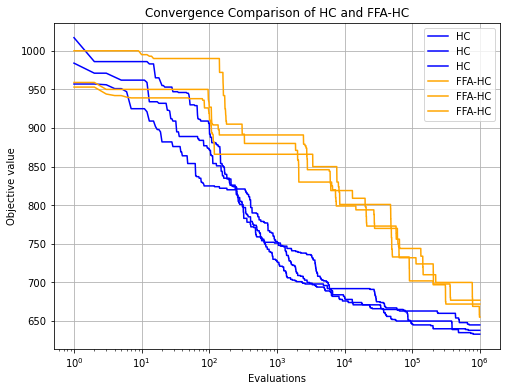

In [89]:
# id 335: 80 jobs x 25 machines
hc_4_conv1 = hc_conversions['hc1_convergence'][4]
hc_4_conv2 = hc_conversions['hc2_convergence'][4]
hc_4_conv3 = hc_conversions['hc3_convergence'][4]

ffahc_4_conv1 = ffahc_conversions['ffahc1_convergence'][4]
ffahc_4_conv2 = ffahc_conversions['ffahc2_convergence'][4]
ffahc_4_conv3 = ffahc_conversions['ffahc3_convergence'][4]

plt.figure(figsize=(8, 6))

plt.plot(iterations, hc_4_conv1, color='blue', label='HC')
plt.plot(iterations, hc_4_conv2, color='blue', label='HC')
plt.plot(iterations, hc_4_conv3, color='blue', label='HC')

plt.plot(iterations, ffahc_4_conv1, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_4_conv2, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_4_conv3, color='orange', label='FFA-HC')

plt.xlabel('Evaluations')
plt.ylabel('Objective value')
plt.title('Convergence Comparison of HC and FFA-HC')
plt.legend()

plt.xscale('log')
plt.grid(True)

plt.show()

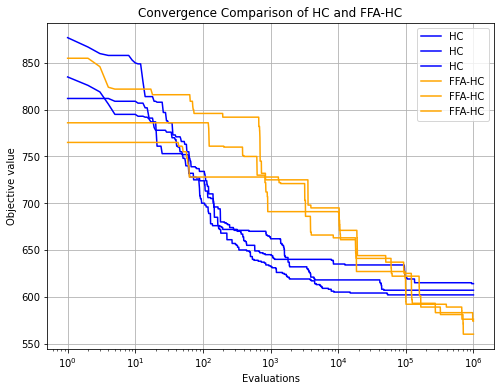

In [90]:
# id 363: 90 jobs x 11 machines
hc_5_conv1 = hc_conversions['hc1_convergence'][5]
hc_5_conv2 = hc_conversions['hc2_convergence'][5]
hc_5_conv3 = hc_conversions['hc3_convergence'][5]

ffahc_5_conv1 = ffahc_conversions['ffahc1_convergence'][5]
ffahc_5_conv2 = ffahc_conversions['ffahc2_convergence'][5]
ffahc_5_conv3 = ffahc_conversions['ffahc3_convergence'][5]

plt.figure(figsize=(8, 6))

plt.plot(iterations, hc_5_conv1, color='blue', label='HC')
plt.plot(iterations, hc_5_conv2, color='blue', label='HC')
plt.plot(iterations, hc_5_conv3, color='blue', label='HC')

plt.plot(iterations, ffahc_5_conv1, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_5_conv2, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_5_conv3, color='orange', label='FFA-HC')

plt.xlabel('Evaluations')
plt.ylabel('Objective value')
plt.title('Convergence Comparison of HC and FFA-HC')
plt.legend()

plt.xscale('log')
plt.grid(True)

plt.show()

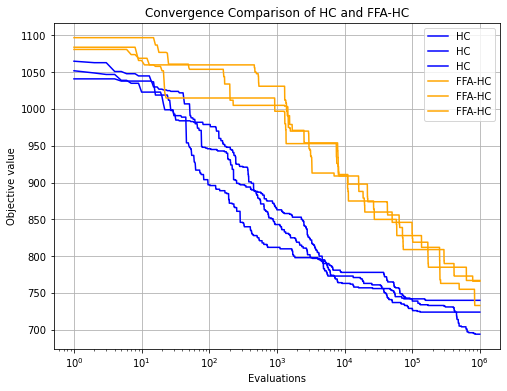

In [91]:
# id 396: 95 jobs x 23 machines
hc_6_conv1 = hc_conversions['hc1_convergence'][6]
hc_6_conv2 = hc_conversions['hc2_convergence'][6]
hc_6_conv3 = hc_conversions['hc3_convergence'][6]

ffahc_6_conv1 = ffahc_conversions['ffahc1_convergence'][6]
ffahc_6_conv2 = ffahc_conversions['ffahc2_convergence'][6]
ffahc_6_conv3 = ffahc_conversions['ffahc3_convergence'][6]

plt.figure(figsize=(8, 6))

plt.plot(iterations, hc_6_conv1, color='blue', label='HC')
plt.plot(iterations, hc_6_conv2, color='blue', label='HC')
plt.plot(iterations, hc_6_conv3, color='blue', label='HC')

plt.plot(iterations, ffahc_6_conv1, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_6_conv2, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_6_conv3, color='orange', label='FFA-HC')

plt.xlabel('Evaluations')
plt.ylabel('Objective value')
plt.title('Convergence Comparison of HC and FFA-HC')
plt.legend()

plt.xscale('log')
plt.grid(True)

plt.show()

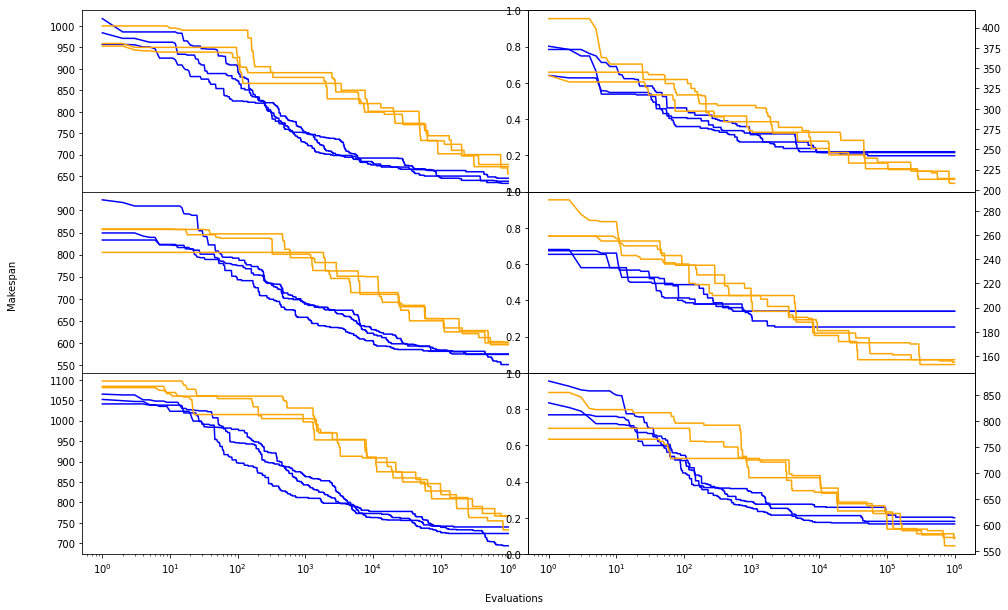

In [92]:
fig, axes = plt.subplots(3, 2, sharex=True, sharey=False, figsize=(16, 10))
plt.subplots_adjust(wspace=0.00, hspace=0.00)

# Set a single y-axis label for the entire grid
fig.text(0.06, 0.5, 'Makespan', va='center', rotation='vertical')

# Set a single x-axis label for the entire grid
fig.text(0.5, 0.06, 'Evaluations', ha='center')

# instance 335 80x25 -4-
ax = plt.subplot(3, 2, 1)
plt.plot(iterations, hc_4_conv1, color='blue', label='HC')
plt.plot(iterations, hc_4_conv2, color='blue', label='HC')
plt.plot(iterations, hc_4_conv3, color='blue', label='HC')

plt.plot(iterations, ffahc_4_conv1, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_4_conv2, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_4_conv3, color='orange', label='FFA-HC')
plt.xscale('log')
# plt.grid(True)

# instance 62 15x25 -2-
ax = plt.subplot(3, 2, 2).twinx()
plt.plot(iterations, hc_2_conv1, color='blue', label='HC')
plt.plot(iterations, hc_2_conv2, color='blue', label='HC')
plt.plot(iterations, hc_2_conv3, color='blue', label='HC')

plt.plot(iterations, ffahc_2_conv1, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_2_conv2, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_2_conv3, color='orange', label='FFA-HC')
# plt.legend()
plt.xscale('log')
# plt.grid(True)
ax.tick_params(labelleft=False)

# instance 293 70x25 -3-
ax = plt.subplot(3, 2, 3)
plt.plot(iterations, hc_3_conv1, color='blue', label='HC')
plt.plot(iterations, hc_3_conv2, color='blue', label='HC')
plt.plot(iterations, hc_3_conv3, color='blue', label='HC')

plt.plot(iterations, ffahc_3_conv1, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_3_conv2, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_3_conv3, color='orange', label='FFA-HC')
plt.xscale('log')
# plt.grid(True)

# instance 37 10x21 -1-
ax = plt.subplot(3, 2, 4).twinx()
plt.plot(iterations, hc_1_conv1, color='blue', label='HC')
plt.plot(iterations, hc_1_conv2, color='blue', label='HC')
plt.plot(iterations, hc_1_conv3, color='blue', label='HC')

plt.plot(iterations, ffahc_1_conv1, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_1_conv2, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_1_conv3, color='orange', label='FFA-HC')
plt.xscale('log')
# plt.grid(True)
ax.tick_params(labelleft=False)

# instance 396 95x23 -6-
ax = plt.subplot(3, 2, 5)
plt.plot(iterations, hc_6_conv1, color='blue', label='HC')
plt.plot(iterations, hc_6_conv2, color='blue', label='HC')
plt.plot(iterations, hc_6_conv3, color='blue', label='HC')

plt.plot(iterations, ffahc_6_conv1, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_6_conv2, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_6_conv3, color='orange', label='FFA-HC')
plt.xscale('log')
# plt.grid(True)

# instance 363 90x11 -5-
ax = plt.subplot(3, 2, 6).twinx()
plt.plot(iterations, hc_5_conv1, color='blue', label='HC')
plt.plot(iterations, hc_5_conv2, color='blue', label='HC')
plt.plot(iterations, hc_5_conv3, color='blue', label='HC')

plt.plot(iterations, ffahc_5_conv1, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_5_conv2, color='orange', label='FFA-HC')
plt.plot(iterations, ffahc_5_conv3, color='orange', label='FFA-HC')
plt.xscale('log')
# plt.grid(True)
ax.tick_params(labelleft=False)


plt.show()
# plt.savefig('convergence_greedy.png')

## Job / Machine ratio related results

In [93]:
job_shop_df['job_machine_ratio'] = (job_shop_df['num_jobs'] / job_shop_df['num_machines']).round(1)
job_shop_df.head(20)

,instance_id,num_jobs,num_machines,problem_instance,hc_best_makespan_4,ffahc_best_makespan_4,ffahc_winner_4,hc_best_makespan_5,ffahc_best_makespan_5,ffahc_winner_5,...,hc_best_makespan_500,ffahc_best_makespan_500,ffahc_winner_500,hc_best_makespan_750,ffahc_best_makespan_750,ffahc_winner_750,hc_best_makespan_6,ffahc_best_makespan_6,ffahc_winner_6,job_machine_ratio
0,5j5m,5,5,"[[(3, 6), (1, 4), (2, 1), (0, 3), (4, 6)], [(0...",51.666667,48.000000,1.0,51.666667,48.000000,1.0,...,51.666667,48.000000,1.0,51.666667,48.000000,1.0,51.666667,48.000000,1.0,1.0
1,5j6m,5,6,"[[(5, 9), (3, 5), (0, 7), (2, 2), (1, 2), (4, ...",52.666667,48.000000,1.0,52.666667,48.000000,1.0,...,52.666667,48.000000,1.0,52.666667,48.000000,1.0,52.666667,48.000000,1.0,0.8
2,5j7m,5,7,"[[(5, 7), (6, 3), (3, 4), (1, 1), (2, 4), (4, ...",58.333333,52.000000,1.0,58.333333,52.000000,1.0,...,58.333333,52.000000,1.0,58.333333,52.000000,1.0,58.333333,52.000000,1.0,0.7
3,5j8m,5,8,"[[(1, 7), (3, 9), (6, 3), (0, 8), (2, 1), (7, ...",59.000000,56.666667,1.0,59.000000,54.000000,1.0,...,59.000000,54.000000,1.0,59.000000,54.000000,1.0,59.000000,54.000000,1.0,0.6
4,5j9m,5,9,"[[(7, 6), (4, 10), (8, 1), (2, 2), (1, 10), (5...",74.000000,61.666667,1.0,74.000000,61.000000,1.0,...,74.000000,61.000000,1.0,74.000000,61.000000,1.0,74.000000,61.000000,1.0,0.6
5,5j10m,5,10,"[[(1, 8), (5, 9), (8, 8), (0, 3), (3, 3), (6, ...",83.666667,80.333333,1.0,83.666667,76.333333,1.0,...,83.666667,75.000000,1.0,83.666667,75.000000,1.0,83.666667,75.000000,1.0,0.5
6,5j11m,5,11,"[[(10, 8), (2, 9), (6, 6), (9, 4), (3, 9), (5,...",91.666667,79.000000,1.0,91.666667,79.000000,1.0,...,91.666667,79.000000,1.0,91.666667,79.000000,1.0,91.666667,79.000000,1.0,0.5
7,5j12m,5,12,"[[(5, 10), (8, 9), (9, 4), (1, 6), (7, 6), (6,...",97.666667,88.666667,1.0,97.666667,88.000000,1.0,...,97.666667,88.000000,1.0,97.666667,88.000000,1.0,97.666667,88.000000,1.0,0.4
8,5j13m,5,13,"[[(7, 4), (12, 1), (5, 3), (0, 6), (4, 5), (8,...",98.000000,98.333333,0.0,98.000000,97.666667,1.0,...,98.000000,97.000000,1.0,98.000000,97.000000,1.0,98.000000,97.000000,1.0,0.4
9,5j14m,5,14,"[[(3, 6), (0, 8), (4, 8), (8, 7), (6, 9), (11,...",99.000000,98.000000,1.0,99.000000,95.000000,1.0,...,99.000000,95.000000,1.0,99.000000,95.000000,1.0,99.000000,95.000000,1.0,0.4


In [94]:
heatmap_pivot_ratios = pd.DataFrame()
heatmap_pivot_ratios['num_jobs'] = job_shop_df['num_jobs']
heatmap_pivot_ratios['num_machines'] = job_shop_df['num_machines']
heatmap_pivot_ratios['job_machine_ratio'] = job_shop_df['job_machine_ratio']
heatmap_pivot_ratios = heatmap_pivot_ratios.pivot('num_jobs', 'num_machines', 'job_machine_ratio')
heatmap_pivot_ratios = heatmap_pivot_ratios.iloc[::-1]
heatmap_pivot_ratios

num_machines,5,6,7,8,9,10,11,12,13,14,...,16,17,18,19,20,21,22,23,24,25
num_jobs,,,,,,,,,,,,,,,,,,,,,
100,20.0,16.7,14.3,12.5,11.1,10.0,9.1,8.3,7.7,7.1,...,6.2,5.9,5.6,5.3,5.0,4.8,4.5,4.3,4.2,4.0
95,19.0,15.8,13.6,11.9,10.6,9.5,8.6,7.9,7.3,6.8,...,5.9,5.6,5.3,5.0,4.8,4.5,4.3,4.1,4.0,3.8
90,18.0,15.0,12.9,11.2,10.0,9.0,8.2,7.5,6.9,6.4,...,5.6,5.3,5.0,4.7,4.5,4.3,4.1,3.9,3.8,3.6
85,17.0,14.2,12.1,10.6,9.4,8.5,7.7,7.1,6.5,6.1,...,5.3,5.0,4.7,4.5,4.2,4.0,3.9,3.7,3.5,3.4
80,16.0,13.3,11.4,10.0,8.9,8.0,7.3,6.7,6.2,5.7,...,5.0,4.7,4.4,4.2,4.0,3.8,3.6,3.5,3.3,3.2
75,15.0,12.5,10.7,9.4,8.3,7.5,6.8,6.2,5.8,5.4,...,4.7,4.4,4.2,3.9,3.8,3.6,3.4,3.3,3.1,3.0
70,14.0,11.7,10.0,8.8,7.8,7.0,6.4,5.8,5.4,5.0,...,4.4,4.1,3.9,3.7,3.5,3.3,3.2,3.0,2.9,2.8
65,13.0,10.8,9.3,8.1,7.2,6.5,5.9,5.4,5.0,4.6,...,4.1,3.8,3.6,3.4,3.2,3.1,3.0,2.8,2.7,2.6
60,12.0,10.0,8.6,7.5,6.7,6.0,5.5,5.0,4.6,4.3,...,3.8,3.5,3.3,3.2,3.0,2.9,2.7,2.6,2.5,2.4


### Include job machine ratios as annotations on the regular results heatmap

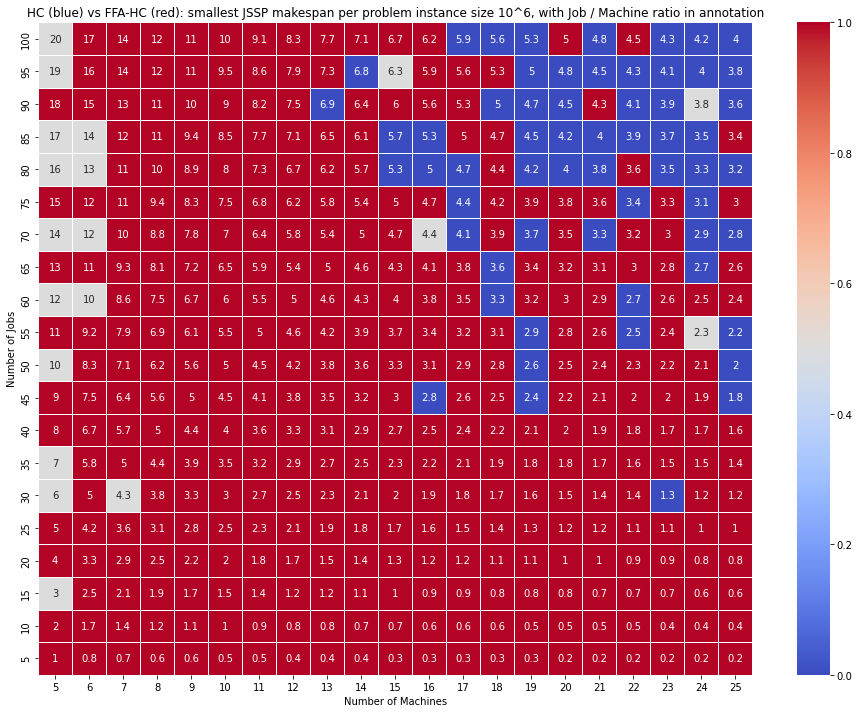

In [95]:
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_pivot_6, annot=heatmap_pivot_ratios, cmap='coolwarm', linewidths=1)

# Add labels and title
plt.xlabel('Number of Machines')
plt.ylabel('Number of Jobs')
plt.title('HC (blue) vs FFA-HC (red): smallest JSSP makespan per problem instance size 10^6, with Job / Machine ratio in annotation')

# Display the heatmap
plt.show()

### Get the differences in optimized makespans between HC and FFA-HC

In [96]:
job_shop_df['makespan_difference_hc_vs_ffahc'] = job_shop_df['ffahc_best_makespan_6'] - job_shop_df['hc_best_makespan_6']
job_shop_df.head()

,instance_id,num_jobs,num_machines,problem_instance,hc_best_makespan_4,ffahc_best_makespan_4,ffahc_winner_4,hc_best_makespan_5,ffahc_best_makespan_5,ffahc_winner_5,...,ffahc_best_makespan_500,ffahc_winner_500,hc_best_makespan_750,ffahc_best_makespan_750,ffahc_winner_750,hc_best_makespan_6,ffahc_best_makespan_6,ffahc_winner_6,job_machine_ratio,makespan_difference_hc_vs_ffahc
0,5j5m,5,5,"[[(3, 6), (1, 4), (2, 1), (0, 3), (4, 6)], [(0...",51.666667,48.000000,1.0,51.666667,48.0,1.0,...,48.0,1.0,51.666667,48.0,1.0,51.666667,48.0,1.0,1.0,-3.666667
1,5j6m,5,6,"[[(5, 9), (3, 5), (0, 7), (2, 2), (1, 2), (4, ...",52.666667,48.000000,1.0,52.666667,48.0,1.0,...,48.0,1.0,52.666667,48.0,1.0,52.666667,48.0,1.0,0.8,-4.666667
2,5j7m,5,7,"[[(5, 7), (6, 3), (3, 4), (1, 1), (2, 4), (4, ...",58.333333,52.000000,1.0,58.333333,52.0,1.0,...,52.0,1.0,58.333333,52.0,1.0,58.333333,52.0,1.0,0.7,-6.333333
3,5j8m,5,8,"[[(1, 7), (3, 9), (6, 3), (0, 8), (2, 1), (7, ...",59.000000,56.666667,1.0,59.000000,54.0,1.0,...,54.0,1.0,59.000000,54.0,1.0,59.000000,54.0,1.0,0.6,-5.000000
4,5j9m,5,9,"[[(7, 6), (4, 10), (8, 1), (2, 2), (1, 10), (5...",74.000000,61.666667,1.0,74.000000,61.0,1.0,...,61.0,1.0,74.000000,61.0,1.0,74.000000,61.0,1.0,0.6,-13.000000


In [97]:
heatmap_pivot_hc_ffahc = pd.DataFrame()
heatmap_pivot_hc_ffahc['num_jobs'] = job_shop_df['num_jobs']
heatmap_pivot_hc_ffahc['num_machines'] = job_shop_df['num_machines']
heatmap_pivot_hc_ffahc['makespan_difference'] = job_shop_df['makespan_difference_hc_vs_ffahc']
heatmap_pivot_hc_ffahc = heatmap_pivot_hc_ffahc.pivot('num_jobs', 'num_machines', 'makespan_difference')
heatmap_pivot_hc_ffahc = heatmap_pivot_hc_ffahc.iloc[::-1]
heatmap_pivot_hc_ffahc

num_machines,5,6,7,8,9,10,11,12,13,14,...,16,17,18,19,20,21,22,23,24,25
num_jobs,,,,,,,,,,,,,,,,,,,,,
100,0.000000,-9.666667,-22.333333,-22.000000,-11.666667,-15.000000,-12.333333,-3.333333,-5.666667,-4.000000,...,-9.666667,15.666667,9.333333,6.333333,-11.000000,10.333333,-1.666667,5.666667,17.666667,23.666667
95,0.000000,-16.666667,-7.666667,-0.666667,-5.000000,-15.666667,-3.666667,-27.666667,-2.666667,11.666667,...,-7.000000,-2.000000,-16.666667,25.000000,13.000000,3.333333,4.000000,36.000000,9.333333,7.000000
90,-2.666667,-0.666667,-3.333333,-2.000000,-12.000000,-10.666667,-37.666667,-5.000000,1.666667,-4.333333,...,-9.666667,-16.000000,11.666667,17.666667,0.333333,-0.666667,16.333333,20.333333,0.000000,21.000000
85,0.000000,0.000000,-8.666667,-6.000000,-16.666667,-10.666667,-8.333333,-9.666667,-13.333333,-4.666667,...,5.000000,-3.333333,-8.000000,11.666667,23.666667,0.666667,6.666667,19.333333,10.000000,-1.333333
80,0.000000,0.000000,-7.333333,-6.000000,-27.000000,-7.666667,-18.666667,-12.666667,-18.000000,-8.333333,...,1.000000,3.333333,-0.333333,11.333333,2.333333,24.666667,-2.333333,7.000000,2.666667,29.333333
75,-4.666667,-1.666667,-8.333333,-9.000000,-4.666667,-7.666667,-7.666667,-19.666667,-13.000000,-2.666667,...,-0.333333,1.333333,-10.666667,-8.333333,-11.000000,-12.000000,4.000000,-11.000000,5.000000,-0.666667
70,0.000000,0.000000,-10.666667,-9.666667,-26.666667,-15.333333,-11.333333,-11.000000,-5.333333,-29.000000,...,0.000000,4.000000,-2.000000,2.333333,-9.666667,6.333333,-4.000000,-1.666667,15.333333,32.666667
65,-4.000000,-8.666667,-1.000000,-13.000000,-14.666667,-29.666667,-14.000000,-15.000000,-12.000000,-15.666667,...,-0.666667,-18.000000,5.666667,-2.000000,-6.333333,-0.333333,-0.666667,-1.000000,3.333333,-8.666667
60,0.000000,0.000000,-19.666667,-13.000000,-6.666667,-10.666667,-11.000000,-6.333333,-10.000000,-1.333333,...,-0.666667,-8.000000,1.666667,-7.333333,-2.333333,-6.666667,7.333333,-0.333333,-5.000000,-16.333333


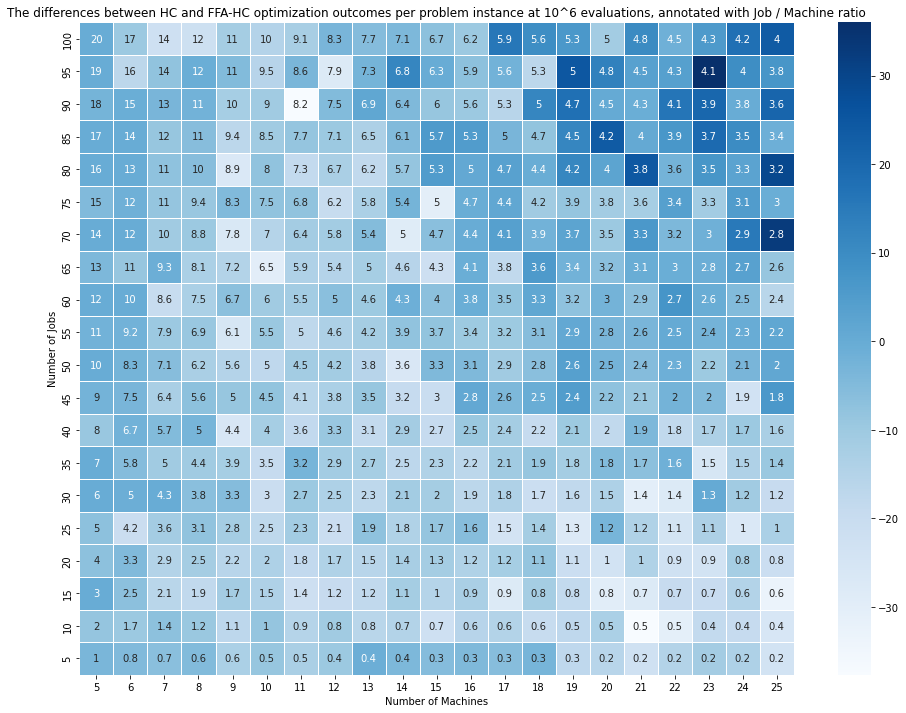

In [98]:
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_pivot_hc_ffahc, annot=heatmap_pivot_ratios, cmap='Blues', linewidths=1)

# Add labels and title
plt.xlabel('Number of Machines')
plt.ylabel('Number of Jobs')
plt.title('The differences between HC and FFA-HC optimization outcomes per problem instance at 10^6 evaluations, annotated with Job / Machine ratio')

# Display the heatmap
plt.show()

#### Normalize hc ffahc result difference (relative difference = ((ffahc results - hc result)/((ffahc result + hc result) / 2))

In [99]:
job_shop_df['rel_makespan_difference_hc_vs_ffahc'] = ((job_shop_df['ffahc_best_makespan_6'] - job_shop_df['hc_best_makespan_6'])/((job_shop_df['ffahc_best_makespan_6'] + job_shop_df['hc_best_makespan_6'])/2))
job_shop_df.head()

,instance_id,num_jobs,num_machines,problem_instance,hc_best_makespan_4,ffahc_best_makespan_4,ffahc_winner_4,hc_best_makespan_5,ffahc_best_makespan_5,ffahc_winner_5,...,ffahc_winner_500,hc_best_makespan_750,ffahc_best_makespan_750,ffahc_winner_750,hc_best_makespan_6,ffahc_best_makespan_6,ffahc_winner_6,job_machine_ratio,makespan_difference_hc_vs_ffahc,rel_makespan_difference_hc_vs_ffahc
0,5j5m,5,5,"[[(3, 6), (1, 4), (2, 1), (0, 3), (4, 6)], [(0...",51.666667,48.000000,1.0,51.666667,48.0,1.0,...,1.0,51.666667,48.0,1.0,51.666667,48.0,1.0,1.0,-3.666667,-0.073579
1,5j6m,5,6,"[[(5, 9), (3, 5), (0, 7), (2, 2), (1, 2), (4, ...",52.666667,48.000000,1.0,52.666667,48.0,1.0,...,1.0,52.666667,48.0,1.0,52.666667,48.0,1.0,0.8,-4.666667,-0.092715
2,5j7m,5,7,"[[(5, 7), (6, 3), (3, 4), (1, 1), (2, 4), (4, ...",58.333333,52.000000,1.0,58.333333,52.0,1.0,...,1.0,58.333333,52.0,1.0,58.333333,52.0,1.0,0.7,-6.333333,-0.114804
3,5j8m,5,8,"[[(1, 7), (3, 9), (6, 3), (0, 8), (2, 1), (7, ...",59.000000,56.666667,1.0,59.000000,54.0,1.0,...,1.0,59.000000,54.0,1.0,59.000000,54.0,1.0,0.6,-5.000000,-0.088496
4,5j9m,5,9,"[[(7, 6), (4, 10), (8, 1), (2, 2), (1, 10), (5...",74.000000,61.666667,1.0,74.000000,61.0,1.0,...,1.0,74.000000,61.0,1.0,74.000000,61.0,1.0,0.6,-13.000000,-0.192593


In [100]:
heatmap_pivot_rel_hc_ffahc = pd.DataFrame()
heatmap_pivot_rel_hc_ffahc['num_jobs'] = job_shop_df['num_jobs']
heatmap_pivot_rel_hc_ffahc['num_machines'] = job_shop_df['num_machines']
heatmap_pivot_rel_hc_ffahc['makespan_difference'] = job_shop_df['rel_makespan_difference_hc_vs_ffahc']
heatmap_pivot_rel_hc_ffahc = heatmap_pivot_rel_hc_ffahc.pivot('num_jobs', 'num_machines', 'makespan_difference')
heatmap_pivot_rel_hc_ffahc = heatmap_pivot_rel_hc_ffahc.iloc[::-1]
heatmap_pivot_rel_hc_ffahc

num_machines,5,6,7,8,9,10,11,12,13,14,...,16,17,18,19,20,21,22,23,24,25
num_jobs,,,,,,,,,,,,,,,,,,,,,
100,0.000000,-0.016251,-0.037171,-0.035948,-0.018914,-0.025119,-0.020257,-0.005305,-0.008969,-0.006015,...,-0.013708,0.022821,0.013520,0.008947,-0.015079,0.013302,-0.002229,0.007455,0.022969,0.030689
95,0.000000,-0.030750,-0.013818,-0.001122,-0.008816,-0.025114,-0.005954,-0.044161,-0.004357,0.018742,...,-0.010717,-0.003009,-0.024474,0.035791,0.018186,0.004679,0.005479,0.048825,0.012550,0.009462
90,-0.005309,-0.001216,-0.006075,-0.003591,-0.022346,-0.019116,-0.063968,-0.008472,0.002853,-0.007305,...,-0.015938,-0.025988,0.018272,0.027497,0.000506,-0.000992,0.024360,0.030071,0.000000,0.029039
85,0.000000,0.000000,-0.017083,-0.012270,-0.032154,-0.019913,-0.014841,-0.017808,-0.023697,-0.008383,...,0.008364,-0.005609,-0.013001,0.019162,0.037477,0.001035,0.010379,0.028913,0.014940,-0.001911
80,0.000000,0.000000,-0.015850,-0.013245,-0.052478,-0.014479,-0.035510,-0.025132,-0.034351,-0.015342,...,0.001733,0.005609,-0.000557,0.019883,0.003843,0.040000,-0.003773,0.011348,0.004100,0.044898
75,-0.010503,-0.003632,-0.018308,-0.020324,-0.010014,-0.016868,-0.016318,-0.037142,-0.026218,-0.005086,...,-0.000631,0.002397,-0.019524,-0.014497,-0.019015,-0.020282,0.006865,-0.018400,0.008137,-0.001099
70,0.000000,0.000000,-0.025157,-0.022542,-0.061162,-0.032670,-0.025335,-0.024673,-0.010951,-0.058606,...,0.000000,0.008163,-0.003807,0.004404,-0.017721,0.011976,-0.007109,-0.002930,0.026916,0.056032
65,-0.011080,-0.021978,-0.002567,-0.032112,-0.035889,-0.069886,-0.031650,-0.035308,-0.027756,-0.035593,...,-0.001408,-0.036511,0.011656,-0.003981,-0.012521,-0.000644,-0.001275,-0.001815,0.005981,-0.015513
60,0.000000,0.000000,-0.054153,-0.035503,-0.017809,-0.028244,-0.027696,-0.015292,-0.023772,-0.003091,...,-0.001471,-0.018018,0.003775,-0.015647,-0.004826,-0.013324,0.014765,-0.000677,-0.009674,-0.032121


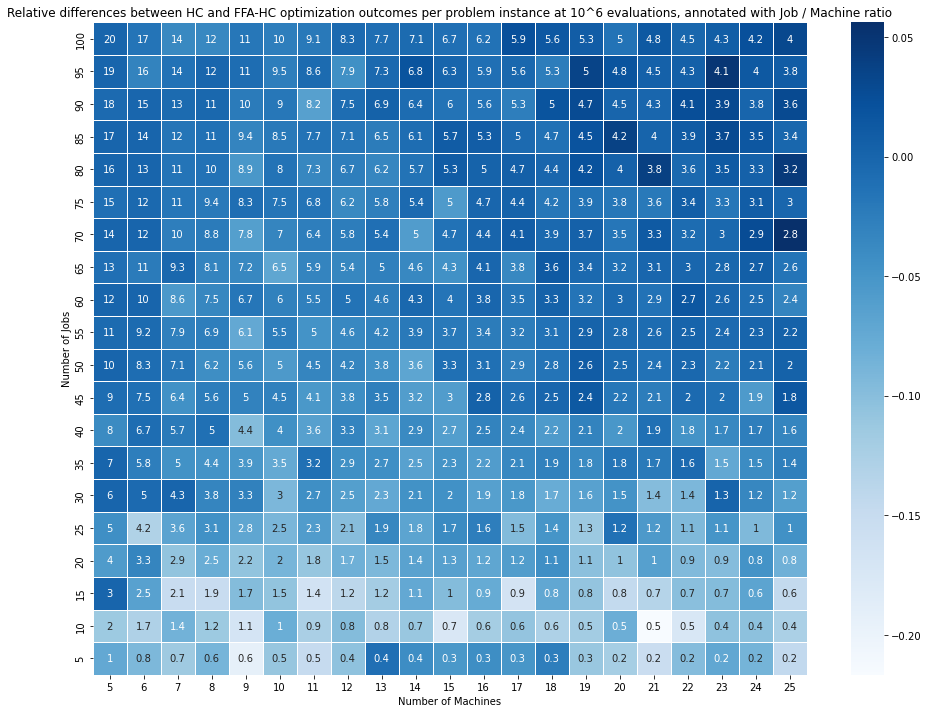

In [101]:
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_pivot_rel_hc_ffahc, annot=heatmap_pivot_ratios, cmap='Blues', linewidths=1)

# Add labels and title
plt.xlabel('Number of Machines')
plt.ylabel('Number of Jobs')
plt.title('Relative differences between HC and FFA-HC optimization outcomes per problem instance at 10^6 evaluations, annotated with Job / Machine ratio')

# Display the heatmap
plt.show()

#### Scatterplot of relative differences plotted to job/machine ratio

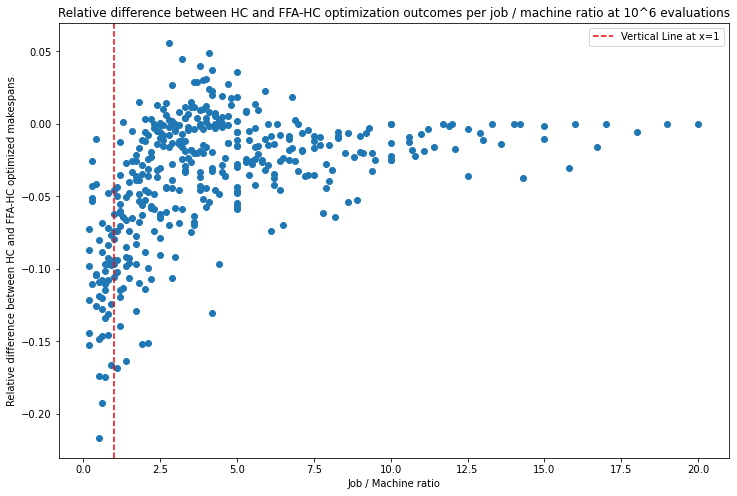

In [102]:
plt.figure(figsize=(12, 8))

plt.scatter(job_shop_df['job_machine_ratio'], job_shop_df['rel_makespan_difference_hc_vs_ffahc'])
plt.axvline(x=1, color='red', linestyle='--', label='Vertical Line at x=1')

plt.xlabel('Job / Machine ratio')
plt.ylabel('Relative difference between HC and FFA-HC optimized makespans')
plt.title('Relative difference between HC and FFA-HC optimization outcomes per job / machine ratio at 10^6 evaluations')
# ook nog avg over al de runs - nu 3-> ook in titel?
plt.legend()

plt.show()

### Get the difference between random intitial makespan and optimized HC makespan

In [103]:
job_shop_df['makespan_difference_random_vs_hc'] = hc_results['random_initial_makespan'] - job_shop_df['hc_best_makespan_6']
job_shop_df.head()

,instance_id,num_jobs,num_machines,problem_instance,hc_best_makespan_4,ffahc_best_makespan_4,ffahc_winner_4,hc_best_makespan_5,ffahc_best_makespan_5,ffahc_winner_5,...,hc_best_makespan_750,ffahc_best_makespan_750,ffahc_winner_750,hc_best_makespan_6,ffahc_best_makespan_6,ffahc_winner_6,job_machine_ratio,makespan_difference_hc_vs_ffahc,rel_makespan_difference_hc_vs_ffahc,makespan_difference_random_vs_hc
0,5j5m,5,5,"[[(3, 6), (1, 4), (2, 1), (0, 3), (4, 6)], [(0...",51.666667,48.000000,1.0,51.666667,48.0,1.0,...,51.666667,48.0,1.0,51.666667,48.0,1.0,1.0,-3.666667,-0.073579,14.333333
1,5j6m,5,6,"[[(5, 9), (3, 5), (0, 7), (2, 2), (1, 2), (4, ...",52.666667,48.000000,1.0,52.666667,48.0,1.0,...,52.666667,48.0,1.0,52.666667,48.0,1.0,0.8,-4.666667,-0.092715,15.000000
2,5j7m,5,7,"[[(5, 7), (6, 3), (3, 4), (1, 1), (2, 4), (4, ...",58.333333,52.000000,1.0,58.333333,52.0,1.0,...,58.333333,52.0,1.0,58.333333,52.0,1.0,0.7,-6.333333,-0.114804,29.000000
3,5j8m,5,8,"[[(1, 7), (3, 9), (6, 3), (0, 8), (2, 1), (7, ...",59.000000,56.666667,1.0,59.000000,54.0,1.0,...,59.000000,54.0,1.0,59.000000,54.0,1.0,0.6,-5.000000,-0.088496,30.333333
4,5j9m,5,9,"[[(7, 6), (4, 10), (8, 1), (2, 2), (1, 10), (5...",74.000000,61.666667,1.0,74.000000,61.0,1.0,...,74.000000,61.0,1.0,74.000000,61.0,1.0,0.6,-13.000000,-0.192593,20.333333


In [104]:
heatmap_pivot_random_hc = pd.DataFrame()
heatmap_pivot_random_hc['num_jobs'] = job_shop_df['num_jobs']
heatmap_pivot_random_hc['num_machines'] = job_shop_df['num_machines']
heatmap_pivot_random_hc['makespan_difference'] = job_shop_df['makespan_difference_random_vs_hc']
heatmap_pivot_random_hc = heatmap_pivot_random_hc.pivot('num_jobs', 'num_machines', 'makespan_difference')
heatmap_pivot_random_hc = heatmap_pivot_random_hc.iloc[::-1]
heatmap_pivot_random_hc

num_machines,5,6,7,8,9,10,11,12,13,14,...,16,17,18,19,20,21,22,23,24,25
num_jobs,,,,,,,,,,,,,,,,,,,,,
100,127.000000,166.666667,240.333333,155.333333,180.000000,262.000000,237.666667,239.333333,256.333333,252.666667,...,275.000000,294.333333,331.666667,310.666667,304.000000,361.000000,320.000000,356.666667,402.666667,302.333333
95,115.333333,142.666667,186.666667,153.333333,214.000000,256.333333,208.000000,232.333333,304.666667,267.333333,...,275.333333,303.666667,305.666667,340.333333,332.000000,332.000000,366.000000,333.333333,333.333333,334.666667
90,174.666667,146.000000,192.666667,191.666667,210.666667,193.666667,233.666667,264.333333,221.333333,306.333333,...,286.000000,289.333333,281.000000,300.666667,340.000000,287.333333,345.666667,351.666667,306.333333,326.666667
85,83.333333,118.000000,193.333333,217.666667,176.666667,213.666667,207.000000,227.666667,200.000000,262.000000,...,256.000000,304.333333,272.666667,301.000000,337.000000,283.666667,330.000000,315.000000,323.333333,339.000000
80,152.333333,136.333333,194.666667,209.333333,178.333333,203.000000,212.666667,207.666667,264.666667,241.000000,...,236.333333,288.333333,290.333333,304.666667,286.666667,342.666667,298.333333,322.333333,290.666667,347.333333
75,118.333333,94.333333,149.000000,187.000000,202.333333,193.000000,205.666667,184.000000,240.333333,263.000000,...,292.000000,275.666667,256.666667,249.333333,257.000000,308.000000,267.333333,304.333333,318.666667,335.000000
70,105.666667,130.333333,170.000000,172.333333,176.000000,178.333333,169.333333,213.000000,249.333333,233.000000,...,248.000000,251.666667,264.000000,279.000000,258.000000,293.000000,288.666667,279.666667,287.333333,302.000000
65,106.333333,155.000000,150.333333,200.666667,139.666667,186.333333,211.333333,155.000000,190.333333,212.000000,...,228.333333,218.000000,239.666667,244.000000,275.333333,245.333333,239.333333,241.000000,279.000000,277.000000
60,86.000000,153.333333,120.666667,145.000000,144.666667,173.333333,148.666667,216.666667,223.666667,201.000000,...,239.333333,220.333333,237.333333,227.666667,242.666667,280.666667,313.333333,260.666667,269.333333,252.000000


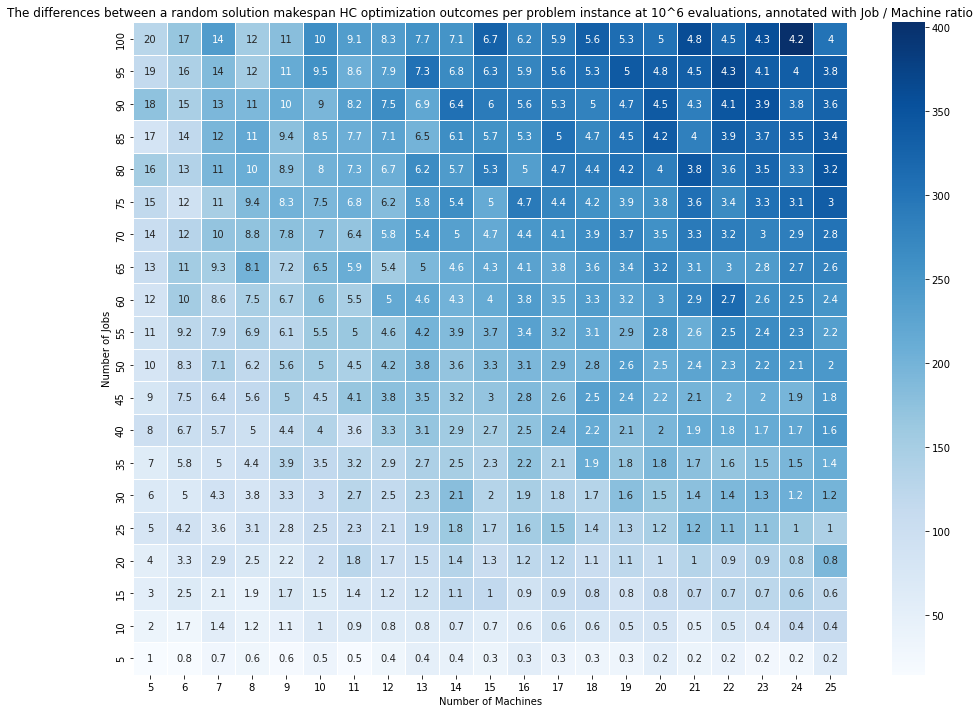

In [105]:
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_pivot_random_hc, annot=heatmap_pivot_ratios, cmap='Blues', linewidths=1)

# Add labels and title
plt.xlabel('Number of Machines')
plt.ylabel('Number of Jobs')
plt.title('The differences between a random solution makespan HC optimization outcomes per problem instance at 10^6 evaluations, annotated with Job / Machine ratio')

# Display the heatmap
plt.show()

#### Normalize difference

In [106]:
job_shop_df['rel_makespan_difference_random_vs_hc'] = ((hc_results['random_initial_makespan'] - job_shop_df['hc_best_makespan_6'])
                                                       /((hc_results['random_initial_makespan'] + job_shop_df['hc_best_makespan_6'])/2))
job_shop_df.head()

,instance_id,num_jobs,num_machines,problem_instance,hc_best_makespan_4,ffahc_best_makespan_4,ffahc_winner_4,hc_best_makespan_5,ffahc_best_makespan_5,ffahc_winner_5,...,ffahc_best_makespan_750,ffahc_winner_750,hc_best_makespan_6,ffahc_best_makespan_6,ffahc_winner_6,job_machine_ratio,makespan_difference_hc_vs_ffahc,rel_makespan_difference_hc_vs_ffahc,makespan_difference_random_vs_hc,rel_makespan_difference_random_vs_hc
0,5j5m,5,5,"[[(3, 6), (1, 4), (2, 1), (0, 3), (4, 6)], [(0...",51.666667,48.000000,1.0,51.666667,48.0,1.0,...,48.0,1.0,51.666667,48.0,1.0,1.0,-3.666667,-0.073579,14.333333,0.243626
1,5j6m,5,6,"[[(5, 9), (3, 5), (0, 7), (2, 2), (1, 2), (4, ...",52.666667,48.000000,1.0,52.666667,48.0,1.0,...,48.0,1.0,52.666667,48.0,1.0,0.8,-4.666667,-0.092715,15.000000,0.249307
2,5j7m,5,7,"[[(5, 7), (6, 3), (3, 4), (1, 1), (2, 4), (4, ...",58.333333,52.000000,1.0,58.333333,52.0,1.0,...,52.0,1.0,58.333333,52.0,1.0,0.7,-6.333333,-0.114804,29.000000,0.398169
3,5j8m,5,8,"[[(1, 7), (3, 9), (6, 3), (0, 8), (2, 1), (7, ...",59.000000,56.666667,1.0,59.000000,54.0,1.0,...,54.0,1.0,59.000000,54.0,1.0,0.6,-5.000000,-0.088496,30.333333,0.408989
4,5j9m,5,9,"[[(7, 6), (4, 10), (8, 1), (2, 2), (1, 10), (5...",74.000000,61.666667,1.0,74.000000,61.0,1.0,...,61.0,1.0,74.000000,61.0,1.0,0.6,-13.000000,-0.192593,20.333333,0.241584


In [107]:
heatmap_pivot_rel_random_hc = pd.DataFrame()
heatmap_pivot_rel_random_hc['num_jobs'] = job_shop_df['num_jobs']
heatmap_pivot_rel_random_hc['num_machines'] = job_shop_df['num_machines']
heatmap_pivot_rel_random_hc['makespan_difference'] = job_shop_df['rel_makespan_difference_random_vs_hc']
heatmap_pivot_rel_random_hc = heatmap_pivot_rel_random_hc.pivot('num_jobs', 'num_machines', 'makespan_difference')
heatmap_pivot_rel_random_hc = heatmap_pivot_rel_random_hc.iloc[::-1]
heatmap_pivot_rel_random_hc

num_machines,5,6,7,8,9,10,11,12,13,14,...,16,17,18,19,20,21,22,23,24,25
num_jobs,,,,,,,,,,,,,,,,,,,,,
100,0.197052,0.244021,0.328249,0.221694,0.252572,0.356140,0.323870,0.319253,0.336028,0.318487,...,0.324484,0.356408,0.389509,0.361240,0.342728,0.379135,0.352164,0.381190,0.418718,0.332052
95,0.187941,0.229491,0.286299,0.228401,0.316256,0.337355,0.288222,0.307116,0.397910,0.356286,...,0.346622,0.371458,0.362953,0.397508,0.379718,0.378707,0.401756,0.376223,0.368053,0.370343
90,0.295544,0.234853,0.297938,0.293143,0.324936,0.293360,0.322521,0.364682,0.318924,0.409263,...,0.379143,0.376573,0.363440,0.383503,0.410628,0.351980,0.413889,0.417739,0.351098,0.372907
85,0.151883,0.210714,0.317808,0.362275,0.287263,0.329817,0.309340,0.344167,0.298805,0.379710,...,0.353917,0.406772,0.360829,0.399469,0.427575,0.361129,0.410448,0.385793,0.391445,0.390628
80,0.276886,0.250536,0.345358,0.373365,0.288955,0.319769,0.331601,0.338128,0.397796,0.360868,...,0.340130,0.391314,0.390146,0.425116,0.382562,0.441771,0.388034,0.416182,0.365925,0.427575
75,0.233937,0.186123,0.279113,0.345763,0.355282,0.347852,0.356751,0.291447,0.386078,0.400203,...,0.432806,0.397501,0.377451,0.354334,0.360702,0.409756,0.374242,0.402824,0.413137,0.432537
70,0.220675,0.261626,0.330525,0.331517,0.327543,0.314984,0.314941,0.381834,0.405860,0.372304,...,0.395114,0.409992,0.401013,0.417560,0.379784,0.435904,0.407146,0.394174,0.407180,0.420808
65,0.255507,0.325516,0.323182,0.392182,0.287479,0.349922,0.380781,0.304021,0.356764,0.382671,...,0.388432,0.356792,0.397347,0.390192,0.425773,0.382934,0.372214,0.358720,0.401343,0.394868
60,0.216080,0.330697,0.278462,0.325721,0.321481,0.369056,0.311670,0.412175,0.416124,0.377465,...,0.417442,0.394745,0.424315,0.388399,0.400440,0.435818,0.482299,0.418630,0.411825,0.392116


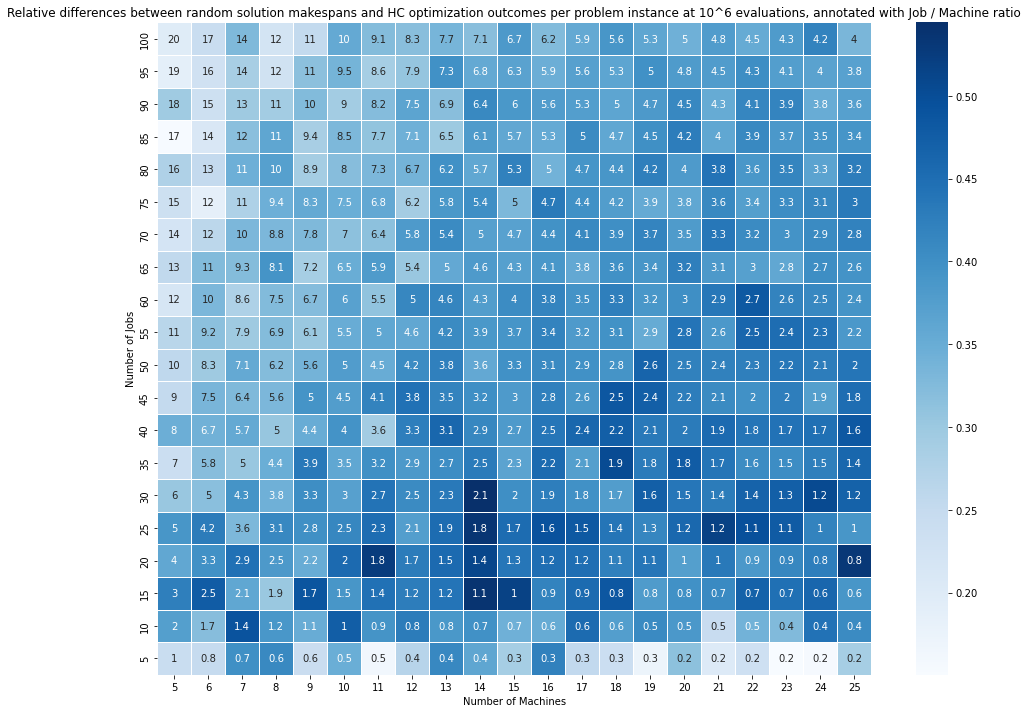

In [108]:
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_pivot_rel_random_hc, annot=heatmap_pivot_ratios, cmap='Blues', linewidths=1)

# Add labels and title
plt.xlabel('Number of Machines')
plt.ylabel('Number of Jobs')
plt.title('Relative differences between random solution makespans and HC optimization outcomes per problem instance at 10^6 evaluations, annotated with Job / Machine ratio')

# Display the heatmap
plt.show()

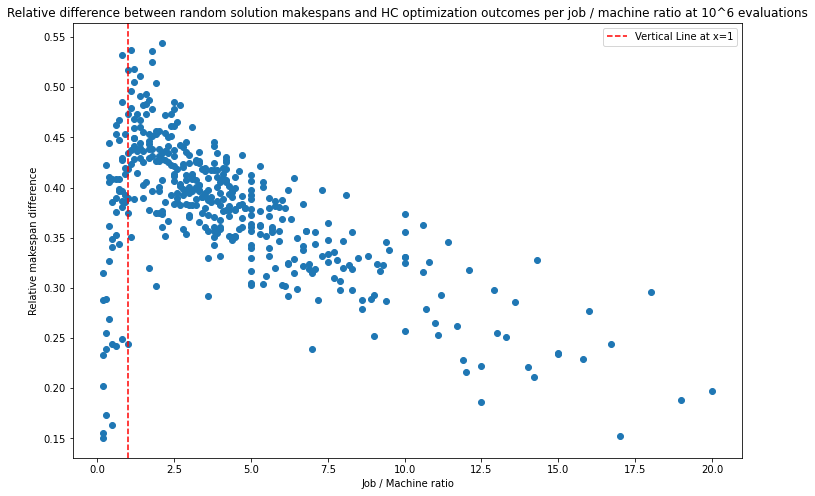

In [109]:
plt.figure(figsize=(12, 8))

plt.scatter(job_shop_df['job_machine_ratio'], job_shop_df['rel_makespan_difference_random_vs_hc'])
plt.axvline(x=1, color='red', linestyle='--', label='Vertical Line at x=1')

plt.xlabel('Job / Machine ratio')
plt.ylabel('Relative makespan difference')
plt.title('Relative difference between random solution makespans and HC optimization outcomes per job / machine ratio at 10^6 evaluations')
plt.legend()

plt.show()

### Get the difference between random initial makespan and optimized FFA HC makespan

In [110]:
job_shop_df['makespan_difference_random_vs_ffahc'] = ffahc_results['random_initial_makespan'] - job_shop_df['ffahc_best_makespan_6']
job_shop_df.head()

,instance_id,num_jobs,num_machines,problem_instance,hc_best_makespan_4,ffahc_best_makespan_4,ffahc_winner_4,hc_best_makespan_5,ffahc_best_makespan_5,ffahc_winner_5,...,ffahc_winner_750,hc_best_makespan_6,ffahc_best_makespan_6,ffahc_winner_6,job_machine_ratio,makespan_difference_hc_vs_ffahc,rel_makespan_difference_hc_vs_ffahc,makespan_difference_random_vs_hc,rel_makespan_difference_random_vs_hc,makespan_difference_random_vs_ffahc
0,5j5m,5,5,"[[(3, 6), (1, 4), (2, 1), (0, 3), (4, 6)], [(0...",51.666667,48.000000,1.0,51.666667,48.0,1.0,...,1.0,51.666667,48.0,1.0,1.0,-3.666667,-0.073579,14.333333,0.243626,15.666667
1,5j6m,5,6,"[[(5, 9), (3, 5), (0, 7), (2, 2), (1, 2), (4, ...",52.666667,48.000000,1.0,52.666667,48.0,1.0,...,1.0,52.666667,48.0,1.0,0.8,-4.666667,-0.092715,15.000000,0.249307,25.000000
2,5j7m,5,7,"[[(5, 7), (6, 3), (3, 4), (1, 1), (2, 4), (4, ...",58.333333,52.000000,1.0,58.333333,52.0,1.0,...,1.0,58.333333,52.0,1.0,0.7,-6.333333,-0.114804,29.000000,0.398169,24.333333
3,5j8m,5,8,"[[(1, 7), (3, 9), (6, 3), (0, 8), (2, 1), (7, ...",59.000000,56.666667,1.0,59.000000,54.0,1.0,...,1.0,59.000000,54.0,1.0,0.6,-5.000000,-0.088496,30.333333,0.408989,21.666667
4,5j9m,5,9,"[[(7, 6), (4, 10), (8, 1), (2, 2), (1, 10), (5...",74.000000,61.666667,1.0,74.000000,61.0,1.0,...,1.0,74.000000,61.0,1.0,0.6,-13.000000,-0.192593,20.333333,0.241584,35.666667


In [111]:
heatmap_pivot_random_ffahc = pd.DataFrame()
heatmap_pivot_random_ffahc['num_jobs'] = job_shop_df['num_jobs']
heatmap_pivot_random_ffahc['num_machines'] = job_shop_df['num_machines']
heatmap_pivot_random_ffahc['makespan_difference'] = job_shop_df['makespan_difference_random_vs_ffahc']
heatmap_pivot_random_ffahc = heatmap_pivot_random_ffahc.pivot('num_jobs', 'num_machines', 'makespan_difference')
heatmap_pivot_random_ffahc = heatmap_pivot_random_ffahc.iloc[::-1]
heatmap_pivot_random_ffahc

num_machines,5,6,7,8,9,10,11,12,13,14,...,16,17,18,19,20,21,22,23,24,25
num_jobs,,,,,,,,,,,,,,,,,,,,,
100,112.333333,175.333333,256.000000,258.666667,210.333333,231.000000,227.333333,232.000000,251.666667,284.000000,...,309.000000,274.666667,329.333333,321.000000,278.000000,356.333333,347.333333,310.000000,348.333333,309.000000
95,95.333333,189.000000,178.333333,160.000000,196.000000,244.333333,241.000000,264.666667,301.666667,270.000000,...,250.000000,264.000000,331.000000,262.333333,304.333333,319.000000,338.666667,332.000000,301.666667,414.666667
90,133.000000,136.666667,144.333333,174.333333,262.666667,229.333333,232.000000,246.666667,230.333333,295.000000,...,293.666667,312.333333,260.000000,326.000000,294.333333,288.000000,313.000000,330.000000,338.333333,278.666667
85,113.333333,194.000000,174.000000,161.000000,207.666667,260.666667,259.000000,233.333333,265.000000,251.666667,...,320.666667,273.666667,345.000000,286.666667,276.000000,325.000000,304.333333,284.000000,298.000000,351.000000
80,122.666667,99.333333,178.666667,208.333333,198.000000,181.333333,191.000000,244.000000,233.666667,262.666667,...,254.333333,284.666667,239.000000,267.333333,310.666667,332.333333,338.000000,289.000000,323.333333,302.666667
75,157.333333,159.666667,162.333333,194.333333,204.666667,187.000000,194.333333,207.666667,215.666667,219.000000,...,252.666667,291.000000,272.333333,260.000000,292.333333,288.666667,259.000000,335.333333,278.666667,326.666667
70,120.666667,139.000000,156.333333,149.666667,173.666667,192.333333,212.333333,202.000000,233.333333,261.333333,...,261.000000,253.000000,260.333333,266.666667,224.666667,306.000000,326.333333,289.333333,275.333333,240.666667
65,128.000000,170.000000,129.333333,142.000000,160.000000,171.666667,222.333333,226.666667,202.000000,232.666667,...,265.666667,249.666667,267.000000,254.333333,241.666667,335.666667,221.333333,269.666667,305.333333,309.333333
60,85.333333,127.666667,155.000000,189.666667,156.000000,173.000000,194.333333,198.333333,223.333333,221.666667,...,220.000000,217.333333,282.333333,236.000000,241.333333,247.000000,293.666667,276.666667,248.333333,301.666667


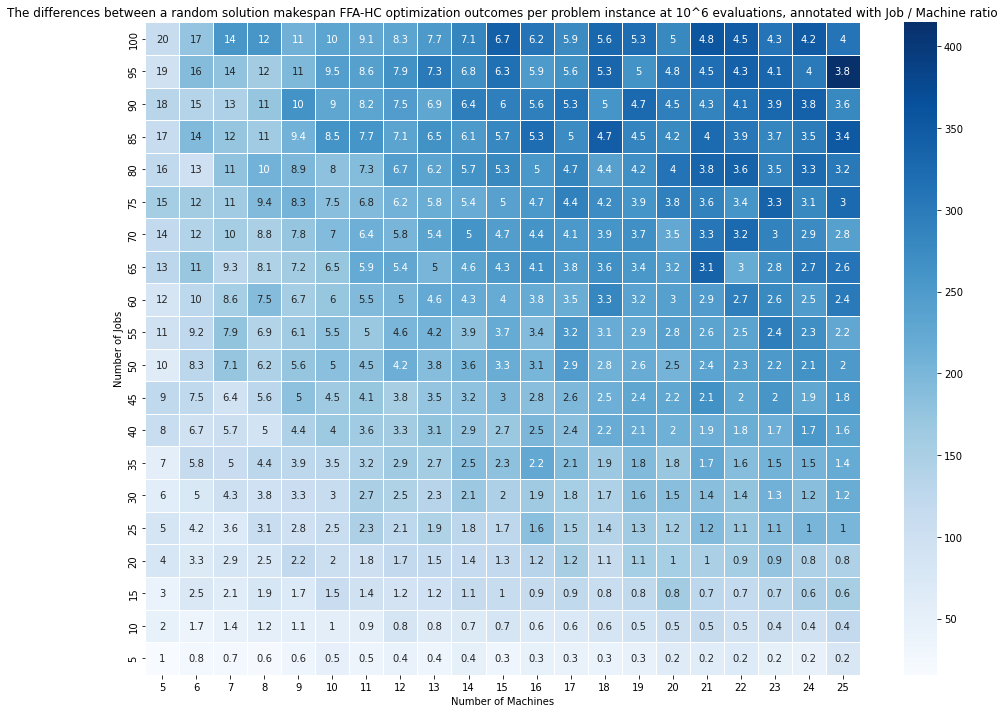

In [112]:
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_pivot_random_ffahc, annot=heatmap_pivot_ratios, cmap='Blues', linewidths=1)

# Add labels and title
plt.xlabel('Number of Machines')
plt.ylabel('Number of Jobs')
plt.title('The differences between a random solution makespan FFA-HC optimization outcomes per problem instance at 10^6 evaluations, annotated with Job / Machine ratio')

# Display the heatmap
plt.show()

#### Normalize difference

In [113]:
job_shop_df['rel_makespan_difference_random_vs_ffahc'] = ((ffahc_results['random_initial_makespan'] - job_shop_df['ffahc_best_makespan_6'])
                                                       /((ffahc_results['random_initial_makespan'] + job_shop_df['ffahc_best_makespan_6'])/2))
job_shop_df.head()

,instance_id,num_jobs,num_machines,problem_instance,hc_best_makespan_4,ffahc_best_makespan_4,ffahc_winner_4,hc_best_makespan_5,ffahc_best_makespan_5,ffahc_winner_5,...,hc_best_makespan_6,ffahc_best_makespan_6,ffahc_winner_6,job_machine_ratio,makespan_difference_hc_vs_ffahc,rel_makespan_difference_hc_vs_ffahc,makespan_difference_random_vs_hc,rel_makespan_difference_random_vs_hc,makespan_difference_random_vs_ffahc,rel_makespan_difference_random_vs_ffahc
0,5j5m,5,5,"[[(3, 6), (1, 4), (2, 1), (0, 3), (4, 6)], [(0...",51.666667,48.000000,1.0,51.666667,48.0,1.0,...,51.666667,48.0,1.0,1.0,-3.666667,-0.073579,14.333333,0.243626,15.666667,0.280597
1,5j6m,5,6,"[[(5, 9), (3, 5), (0, 7), (2, 2), (1, 2), (4, ...",52.666667,48.000000,1.0,52.666667,48.0,1.0,...,52.666667,48.0,1.0,0.8,-4.666667,-0.092715,15.000000,0.249307,25.000000,0.413223
2,5j7m,5,7,"[[(5, 7), (6, 3), (3, 4), (1, 1), (2, 4), (4, ...",58.333333,52.000000,1.0,58.333333,52.0,1.0,...,58.333333,52.0,1.0,0.7,-6.333333,-0.114804,29.000000,0.398169,24.333333,0.379221
3,5j8m,5,8,"[[(1, 7), (3, 9), (6, 3), (0, 8), (2, 1), (7, ...",59.000000,56.666667,1.0,59.000000,54.0,1.0,...,59.000000,54.0,1.0,0.6,-5.000000,-0.088496,30.333333,0.408989,21.666667,0.334190
4,5j9m,5,9,"[[(7, 6), (4, 10), (8, 1), (2, 2), (1, 10), (5...",74.000000,61.666667,1.0,74.000000,61.0,1.0,...,74.000000,61.0,1.0,0.6,-13.000000,-0.192593,20.333333,0.241584,35.666667,0.452431


In [114]:
heatmap_pivot_rel_random_ffahc = pd.DataFrame()
heatmap_pivot_rel_random_ffahc['num_jobs'] = job_shop_df['num_jobs']
heatmap_pivot_rel_random_ffahc['num_machines'] = job_shop_df['num_machines']
heatmap_pivot_rel_random_ffahc['makespan_difference'] = job_shop_df['rel_makespan_difference_random_vs_ffahc']
heatmap_pivot_rel_random_ffahc = heatmap_pivot_rel_random_ffahc.pivot('num_jobs', 'num_machines', 'makespan_difference')
heatmap_pivot_rel_random_ffahc = heatmap_pivot_rel_random_ffahc.iloc[::-1]
heatmap_pivot_rel_random_ffahc

num_machines,5,6,7,8,9,10,11,12,13,14,...,16,17,18,19,20,21,22,23,24,25
num_jobs,,,,,,,,,,,,,,,,,,,,,
100,0.176301,0.258731,0.356712,0.354176,0.293693,0.327582,0.317357,0.312388,0.333407,0.352795,...,0.361474,0.330261,0.383094,0.368330,0.322132,0.371116,0.377263,0.337691,0.365832,0.329600
95,0.157924,0.300876,0.278573,0.237389,0.295775,0.331000,0.328114,0.355257,0.396148,0.353712,...,0.322719,0.331797,0.394910,0.311498,0.348407,0.365197,0.375740,0.360347,0.335496,0.436185
90,0.234361,0.221741,0.233109,0.271055,0.396578,0.343656,0.338192,0.346929,0.328969,0.399458,...,0.392340,0.408902,0.335773,0.400327,0.365405,0.352941,0.374775,0.387627,0.380792,0.319206
85,0.201064,0.324415,0.294915,0.284201,0.338311,0.394551,0.377093,0.356415,0.384895,0.370007,...,0.421560,0.375143,0.440145,0.378188,0.353242,0.402809,0.381450,0.346201,0.361943,0.402292
80,0.229141,0.188966,0.325836,0.375940,0.330000,0.294213,0.312177,0.393760,0.369823,0.391845,...,0.360842,0.385553,0.332792,0.376880,0.406809,0.417942,0.429843,0.377860,0.397541,0.369406
75,0.302177,0.296870,0.305042,0.362901,0.361602,0.343645,0.345073,0.333066,0.361150,0.346245,...,0.385947,0.414235,0.402166,0.371075,0.406489,0.395434,0.362660,0.441228,0.368444,0.424426
70,0.248115,0.276617,0.314660,0.300033,0.340857,0.344786,0.387587,0.373153,0.388242,0.427714,...,0.411564,0.409054,0.397759,0.401405,0.344053,0.446715,0.450840,0.405987,0.385082,0.334414
65,0.302600,0.357895,0.285084,0.302557,0.332410,0.346451,0.406831,0.427136,0.383059,0.424058,...,0.438514,0.410074,0.428916,0.404667,0.387597,0.489667,0.349474,0.393578,0.429040,0.436295
60,0.214585,0.283179,0.359768,0.417308,0.347439,0.377043,0.397545,0.388762,0.423515,0.409357,...,0.390764,0.396112,0.483862,0.404803,0.400221,0.398066,0.453773,0.438921,0.388932,0.463271


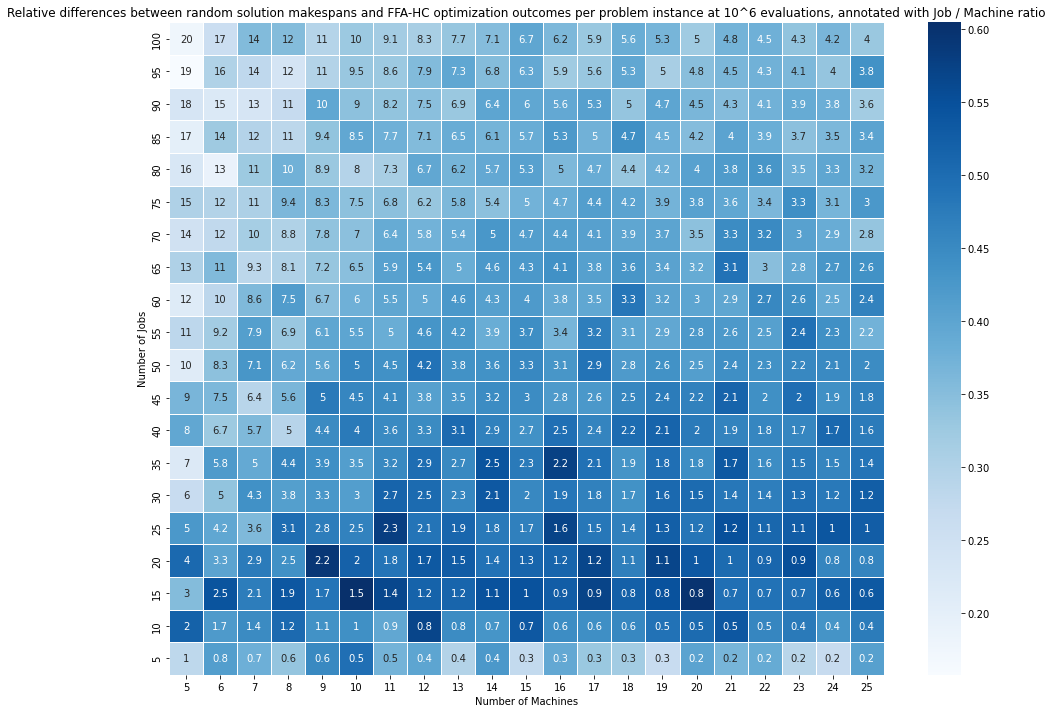

In [115]:
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_pivot_rel_random_ffahc, annot=heatmap_pivot_ratios, cmap='Blues', linewidths=1)

# Add labels and title
plt.xlabel('Number of Machines')
plt.ylabel('Number of Jobs')
plt.title('Relative differences between random solution makespans and FFA-HC optimization outcomes per problem instance at 10^6 evaluations, annotated with Job / Machine ratio')

# Display the heatmap
plt.show()

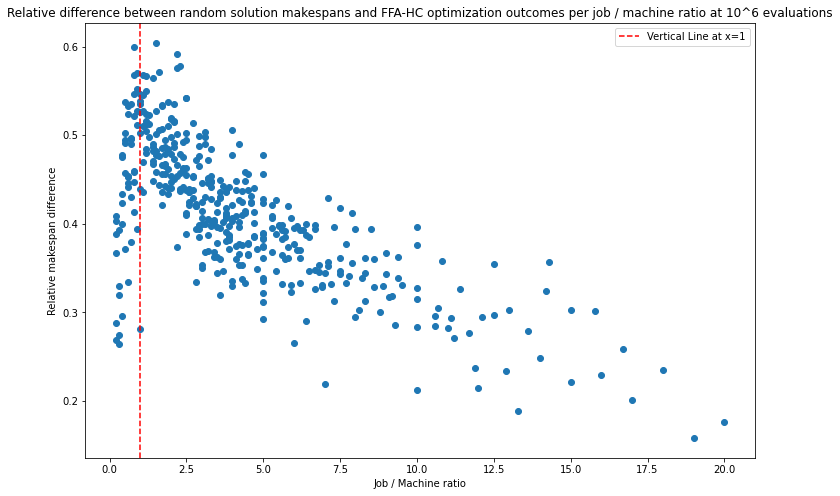

In [116]:
plt.figure(figsize=(12, 8))

plt.scatter(job_shop_df['job_machine_ratio'], job_shop_df['rel_makespan_difference_random_vs_ffahc'])
plt.axvline(x=1, color='red', linestyle='--', label='Vertical Line at x=1')

plt.xlabel('Job / Machine ratio')
plt.ylabel('Relative makespan difference')
plt.title('Relative difference between random solution makespans and FFA-HC optimization outcomes per job / machine ratio at 10^6 evaluations')
plt.legend()

plt.show()

## Tournament heatmaps

In [194]:
hc_tournament = pd.read_csv('hc_all_runs_makespans_greedy.csv')
hc_tournament.head()

,instance_id,run1_4,run2_4,run3_4,run1_5,run2_5,run3_5,run1_250,run2_250,run3_250,run1_500,run2_500,run3_500,run1_750,run2_750,run3_750,run1_best,run2_best,run3_best
0,0,52,52,52,52,52,51,52,52,51,52,52,51,52,52,51,52,52,52
1,1,51,59,51,51,59,48,51,59,48,51,59,48,51,59,48,51,59,51
2,2,56,63,56,56,63,56,56,63,56,56,63,56,56,63,56,56,63,56
3,3,57,61,57,57,61,59,57,61,59,57,61,59,57,61,59,57,61,57
4,4,82,78,82,82,78,62,82,78,62,82,78,62,82,78,62,82,78,82


In [201]:
ffahc_tournament = pd.read_csv('ffahc_all_runs_makespans_greedy.csv')
ffahc_tournament.head()

,instance_id,run1_4,run2_4,run3_4,run1_5,run2_5,run3_5,run1_250,run2_250,run3_250,run1_500,run2_500,run3_500,run1_750,run2_750,run3_750,run1_best,run2_best,run3_best
0,0,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
1,1,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
2,2,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
3,3,56,56,56,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
4,4,61,63,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61


In [202]:
# makes groups of three per tournament per algorithm (based on num evaluation)
hc_tourn_4 = hc_tournament.loc[:, 'run1_4':'run3_4']
ffahc_tourn_4 = ffahc_tournament.loc[:, 'run1_4':'run3_4']

hc_tourn_5 = hc_tournament.loc[:, 'run1_5':'run3_5']
ffahc_tourn_5 = ffahc_tournament.loc[:, 'run1_5':'run3_5']

hc_tourn_250 = hc_tournament.loc[:, 'run1_250':'run3_250']
ffahc_tourn_250 = ffahc_tournament.loc[:, 'run1_250':'run3_250']

hc_tourn_500 = hc_tournament.loc[:, 'run1_500':'run3_500']
ffahc_tourn_500 = ffahc_tournament.loc[:, 'run1_500':'run3_500']

hc_tourn_750 = hc_tournament.loc[:, 'run1_750':'run3_750']
ffahc_tourn_750 = ffahc_tournament.loc[:, 'run1_750':'run3_750']

hc_tourn_best = hc_tournament.loc[:, 'run1_best':'run3_best']
ffahc_tourn_best = ffahc_tournament.loc[:, 'run1_best':'run3_best']

In [203]:
# set random seed
random.seed(16)

# function that randomly sets a random result of each relevant algorithm up against each other and gives a score per num evaliations
def score_tournament(hc_tourn, ffahc_tourn):
    all_final_instance_scores = []
    
    for instance in range(len(hc_tourn)):
        hc_col_indices = [0, 1, 2]
        ffahc_col_indices = [0, 1, 2]
        num_runs = len(hc_col_indices)
        
        instance_score = 0
    
        for run in range(num_runs):
            # randomly pop indices for hc and ffa to determine which runs will be compared at a certain moment
            random.shuffle(hc_col_indices)
            random.shuffle(ffahc_col_indices)
            
            hc_run = hc_col_indices.pop()
            hc_candidate = hc_tourn.iloc[instance, hc_run]
            
            ffahc_run = ffahc_col_indices.pop()
            ffahc_candidate = ffahc_tourn.iloc[instance, ffahc_run]
        
            # give scores for this tournament round
            if hc_run > ffahc_run:
                instance_score += 1
            elif hc_run == ffahc_run:
                instance_score += 0.5
            else:
                instance_score += 0
                
                
        # final instance score is average score per round
        final_instance_score = instance_score / 3
#         final_instance_score = instance_score
        all_final_instance_scores.append(final_instance_score)
        
    return all_final_instance_scores
                
            

In [204]:
tourn_4_scores = score_tournament(hc_tourn_4, ffahc_tourn_4)
tourn_5_scores = score_tournament(hc_tourn_5, ffahc_tourn_5)
tourn_250_scores = score_tournament(hc_tourn_250, ffahc_tourn_250)
tourn_500_scores = score_tournament(hc_tourn_500, ffahc_tourn_500)
tourn_750_scores = score_tournament(hc_tourn_750, ffahc_tourn_750)
tourn_best_scores = score_tournament(hc_tourn_best, ffahc_tourn_best)

In [205]:
# add results to job shop df
job_shop_df['tournament_4'] = tourn_4_scores
job_shop_df['tournament_5'] = tourn_5_scores
job_shop_df['tournament_250'] = tourn_250_scores
job_shop_df['tournament_500'] = tourn_500_scores
job_shop_df['tournament_500'] = tourn_500_scores
job_shop_df['tournament_750'] = tourn_750_scores
job_shop_df['tournament_best'] = tourn_best_scores
job_shop_df.head()

,instance_id,num_jobs,num_machines,problem_instance,hc_best_makespan_4,ffahc_best_makespan_4,ffahc_winner_4,hc_best_makespan_5,ffahc_best_makespan_5,ffahc_winner_5,...,makespan_difference_random_vs_hc,rel_makespan_difference_random_vs_hc,makespan_difference_random_vs_ffahc,rel_makespan_difference_random_vs_ffahc,tournament_4,tournament_5,tournament_250,tournament_500,tournament_750,tournament_best
0,5j5m,5,5,"[[(3, 6), (1, 4), (2, 1), (0, 3), (4, 6)], [(0...",51.666667,48.000000,1.0,51.666667,48.0,1.0,...,14.333333,0.243626,15.666667,0.280597,0.500000,0.500000,0.500000,0.500000,0.333333,0.333333
1,5j6m,5,6,"[[(5, 9), (3, 5), (0, 7), (2, 2), (1, 2), (4, ...",52.666667,48.000000,1.0,52.666667,48.0,1.0,...,15.000000,0.249307,25.000000,0.413223,0.500000,0.333333,0.666667,0.333333,0.500000,0.500000
2,5j7m,5,7,"[[(5, 7), (6, 3), (3, 4), (1, 1), (2, 4), (4, ...",58.333333,52.000000,1.0,58.333333,52.0,1.0,...,29.000000,0.398169,24.333333,0.379221,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
3,5j8m,5,8,"[[(1, 7), (3, 9), (6, 3), (0, 8), (2, 1), (7, ...",59.000000,56.666667,1.0,59.000000,54.0,1.0,...,30.333333,0.408989,21.666667,0.334190,0.666667,0.500000,0.500000,0.666667,0.500000,0.333333
4,5j9m,5,9,"[[(7, 6), (4, 10), (8, 1), (2, 2), (1, 10), (5...",74.000000,61.666667,1.0,74.000000,61.0,1.0,...,20.333333,0.241584,35.666667,0.452431,0.500000,0.500000,0.666667,0.500000,0.500000,0.500000


In [206]:
# pivot tables
tournament_pivot_4 = pd.DataFrame()
tournament_pivot_4['num_jobs'] = job_shop_df['num_jobs']
tournament_pivot_4['num_machines'] = job_shop_df['num_machines']
tournament_pivot_4['tournament_4'] = job_shop_df['tournament_4']
tournament_pivot_4 = tournament_pivot_4.pivot('num_jobs', 'num_machines', 'tournament_4')
tournament_pivot_4 = tournament_pivot_4.iloc[::-1]

tournament_pivot_5 = pd.DataFrame()
tournament_pivot_5['num_jobs'] = job_shop_df['num_jobs']
tournament_pivot_5['num_machines'] = job_shop_df['num_machines']
tournament_pivot_5['tournament_5'] = job_shop_df['tournament_5']
tournament_pivot_5 = tournament_pivot_5.pivot('num_jobs', 'num_machines', 'tournament_5')
tournament_pivot_5 = tournament_pivot_5.iloc[::-1]

tournament_pivot_250 = pd.DataFrame()
tournament_pivot_250['num_jobs'] = job_shop_df['num_jobs']
tournament_pivot_250['num_machines'] = job_shop_df['num_machines']
tournament_pivot_250['tournament_250'] = job_shop_df['tournament_250']
tournament_pivot_250 = tournament_pivot_250.pivot('num_jobs', 'num_machines', 'tournament_250')
tournament_pivot_250 = tournament_pivot_250.iloc[::-1]

tournament_pivot_500 = pd.DataFrame()
tournament_pivot_500['num_jobs'] = job_shop_df['num_jobs']
tournament_pivot_500['num_machines'] = job_shop_df['num_machines']
tournament_pivot_500['tournament_500'] = job_shop_df['tournament_500']
tournament_pivot_500 = tournament_pivot_500.pivot('num_jobs', 'num_machines', 'tournament_500')
tournament_pivot_500 = tournament_pivot_500.iloc[::-1]

tournament_pivot_750 = pd.DataFrame()
tournament_pivot_750['num_jobs'] = job_shop_df['num_jobs']
tournament_pivot_750['num_machines'] = job_shop_df['num_machines']
tournament_pivot_750['tournament_750'] = job_shop_df['tournament_750']
tournament_pivot_750 = tournament_pivot_750.pivot('num_jobs', 'num_machines', 'tournament_750')
tournament_pivot_750 = tournament_pivot_750.iloc[::-1]

tournament_pivot_best = pd.DataFrame()
tournament_pivot_best['num_jobs'] = job_shop_df['num_jobs']
tournament_pivot_best['num_machines'] = job_shop_df['num_machines']
tournament_pivot_best['tournament_best'] = job_shop_df['tournament_best']
tournament_pivot_best = tournament_pivot_best.pivot('num_jobs', 'num_machines', 'tournament_best')
tournament_pivot_best = tournament_pivot_best.iloc[::-1]

In [207]:
tournament_pivot_4

num_machines,5,6,7,8,9,10,11,12,13,14,...,16,17,18,19,20,21,22,23,24,25
num_jobs,,,,,,,,,,,,,,,,,,,,,
100,0.333333,0.500000,0.500000,0.500000,0.666667,0.666667,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.333333,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
95,0.500000,0.500000,0.666667,0.500000,0.500000,0.500000,0.333333,0.500000,0.500000,0.500000,...,0.666667,0.333333,0.500000,0.500000,0.500000,0.500000,0.333333,0.333333,0.500000,0.666667
90,0.333333,0.333333,0.500000,0.333333,0.500000,0.333333,0.500000,0.500000,0.500000,0.333333,...,0.500000,0.666667,0.500000,0.500000,0.500000,0.500000,0.666667,0.500000,0.500000,0.500000
85,0.500000,0.500000,0.333333,0.500000,0.500000,0.500000,0.500000,0.500000,0.666667,0.500000,...,0.666667,0.500000,0.666667,0.666667,0.500000,0.500000,0.500000,0.333333,0.333333,0.500000
80,0.666667,0.500000,0.500000,0.666667,0.500000,0.333333,0.666667,0.500000,0.500000,0.666667,...,0.500000,0.500000,0.500000,0.500000,0.666667,0.500000,0.666667,0.500000,0.500000,0.500000
75,0.333333,0.500000,0.666667,0.666667,0.500000,0.333333,0.666667,0.500000,0.500000,0.500000,...,0.500000,0.666667,0.500000,0.500000,0.333333,0.500000,0.500000,0.500000,0.500000,0.333333
70,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.333333,0.500000,0.333333,...,0.500000,0.333333,0.500000,0.500000,0.500000,0.500000,0.500000,0.333333,0.500000,0.666667
65,0.333333,0.666667,0.666667,0.333333,0.500000,0.666667,0.666667,0.500000,0.500000,0.666667,...,0.666667,0.333333,0.666667,0.666667,0.500000,0.666667,0.500000,0.500000,0.500000,0.500000
60,0.333333,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.666667,0.500000,...,0.666667,0.500000,0.666667,0.500000,0.500000,0.500000,0.333333,0.666667,0.666667,0.500000


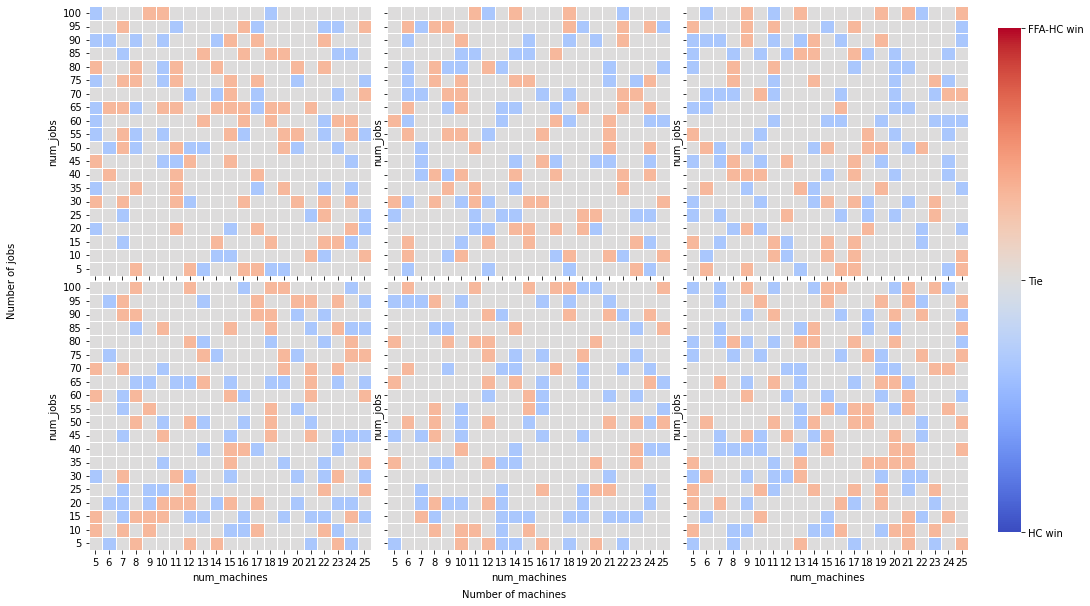

In [208]:
# heatmaps

# plt.figure(figsize=(16, 10))
# grid = GridSpec(2, 3)
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(16, 10))
# plt.tight_layout(rect=[0, 0, .9, 1])
plt.subplots_adjust(wspace=0.01, hspace=0.02)  # Adjust the space between subplots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])

# Set a single y-axis label for the entire grid
fig.text(0.06, 0.5, 'Number of jobs', va='center', rotation='vertical')

# Set a single x-axis label for the entire grid
fig.text(0.5, 0.06, 'Number of machines', ha='center')

# plt.subplot(grid[0, 0])
ax = plt.subplot(2, 3, 1)
sns.heatmap(tournament_pivot_4, annot=False, cmap='coolwarm', linewidths=1, 
            yticklabels=yticks, cbar=False, ax=ax, vmin=0, vmax=1)
ax.set_aspect('equal')


# plt.subplot(grid[0, 1])
ax = plt.subplot(2, 3, 2)
sns.heatmap(tournament_pivot_5, annot=False, cmap='coolwarm', linewidths=1, 
            cbar=False, ax=ax, vmin=0, vmax=1)
ax.set_aspect('equal')


# plt.subplot(grid[0, 2])
ax = plt.subplot(2, 3, 3)
sns.heatmap(tournament_pivot_250, annot=False, cmap='coolwarm', linewidths=1, 
            cbar=False, ax=ax, vmin=0, vmax=1)
ax.set_aspect('equal')


# plt.subplot(grid[1, 0])
ax = plt.subplot(2, 3, 4)
sns.heatmap(tournament_pivot_500, annot=False, cmap='coolwarm', linewidths=1, 
            xticklabels=xticks, yticklabels=yticks, cbar=False, ax=ax, vmin=0, vmax=1)
ax.set_aspect('equal')


# plt.subplot(grid[1, 1])
ax = plt.subplot(2, 3, 5)
sns.heatmap(tournament_pivot_750, annot=False, cmap='coolwarm', linewidths=1, xticklabels=xticks, 
            cbar=False, ax=ax, vmin=0, vmax=1)
ax.set_aspect('equal')


# plt.subplot(grid[1, 2])
ax = plt.subplot(2, 3, 6)
sns.heatmap(tournament_pivot_best, annot=False, cmap='coolwarm', linewidths=1, xticklabels=xticks, 
            yticklabels=yticks, cbar=True, cbar_ax=cbar_ax, ax=ax, vmin=0, vmax=1)
ax.set_aspect('equal')

cbar = ax.collections[0].colorbar
cbar.set_ticks([0, 0.5, 1])  # Specify the positions for the custom labels
cbar.set_ticklabels(['HC win', 'Tie', 'FFA-HC win'])  # Set the custom labels


# cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjust the position of the color bar
# fig.colorbar(heatmap, cax=cbar_ax)

# plt.savefig('tournaments_greedy.png')
plt.show()